In [413]:
install.packages("fACD", repos="http://R-Forge.R-project.org")
install.packages("ACDm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [414]:
install.packages("DAAG")
install.packages("graphics")
install.packages("lmvar")
install.packages("ggplot2")
install.packages("R.utils")
install.packages("WVPlots")
install.packages("vtreat")
install.packages("Metrics")
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘graphics’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [415]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [416]:
library("ACDm")

In [417]:
transIBM <- read.csv("ibm.txt", header = FALSE, sep= "")
names(transIBM) <- c("time", "Volume", "Bid Price", "Ask Price","Price")
head(transIBM, 11)

time        Volume Bid Price Ask Price Price  
1  90110134228 18800  105.375   105.50    105.375
2  90110134236   400  105.375   105.50    105.375
3  90110134236   100  105.375   105.50    105.375
4  90110134237  1000  105.250   105.62    105.375
5  90110134242   100  105.375   105.50    105.375
6  90110134246   100  105.375   105.50    105.375
7  90110134308  1000  105.125   105.75    105.500
8  90110134310  2000  105.125   105.75    105.375
9  90110134322   100  105.125   105.75    105.375
10 90110134344  5000  105.125   105.75    105.500
11 90110134348 10000  105.125   105.75    105.500

In [418]:
# Splitting timestamps into date and time parts
time <- transIBM[ , 1]
time <- substr(time, 1, 6) 

In [419]:
time <- strptime(time, format = "%y%m%d") 

In [420]:
head(time)

[1] "1990-11-01 UTC" "1990-11-01 UTC" "1990-11-01 UTC" "1990-11-01 UTC"
[5] "1990-11-01 UTC" "1990-11-01 UTC"

In [421]:
time <- time + as.numeric(substr(transIBM[ ,1], 7, 11))

In [422]:
transIBM$time <- as.POSIXlt(time)

In [423]:
# Removing dates November 23 and December 27 with no trades
transIBM <- transIBM[transIBM[ ,1]$yday != strptime("901227", format ="%y%m%d")$yday, ]
transIBM <- transIBM[transIBM[ ,1]$yday != strptime("901123", format ="%y%m%d")$yday, ]

The 59469 transactions resulted in 46120 durations

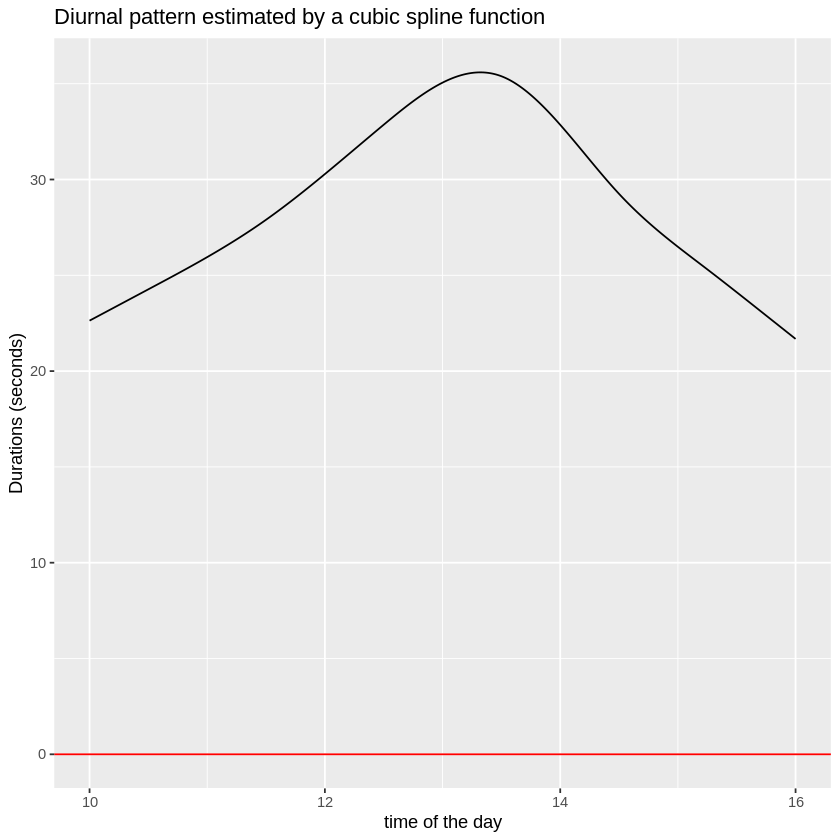

In [424]:
# Removing trades at the end of day cycle and performing diurnal adjustments
DurationsIBM <- computeDurations(transIBM, open = "10:00:00", close ="16:00:00")
# Obtaining diurnally adjusted duration by removing daily seasonal variation to get a stationary duration process
AdjDurationsIBM <- diurnalAdj(DurationsIBM, aggregation = "all", method= "cubicSpline", nodes = c(seq(600, 900, 60), 930, 960)) 

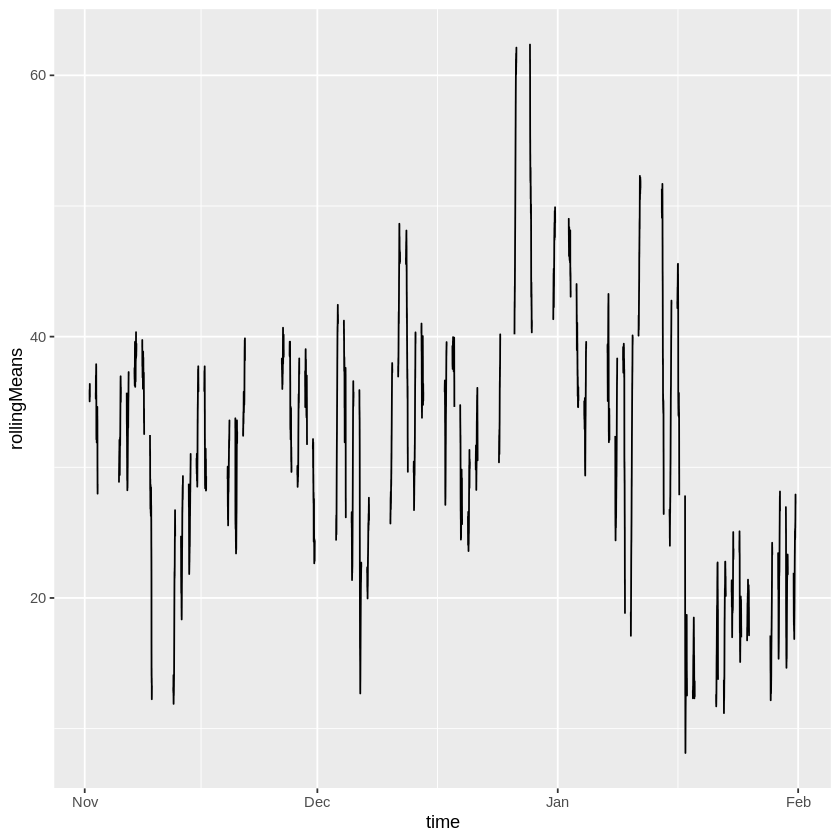

In [425]:
# Plotting the Rolling Mean for the Duration
plotRollMeanAcd(DurationsIBM, window = 500) 

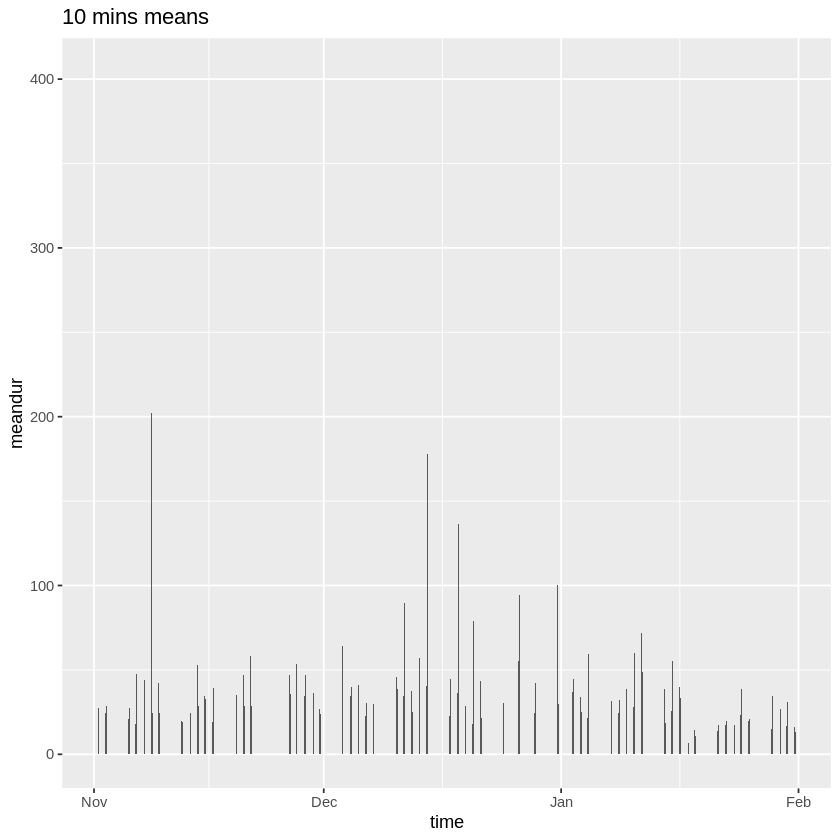

In [426]:
# Plotting mean duration over a specified interval length in a bar plot
plotHistAcd(DurationsIBM, windowunit = "mins", window = 10)

Warning message in diurnalAdj(DurationsIBM):
“no durations occured at the latest interval. Check if the 'node' argument is correctly specified”


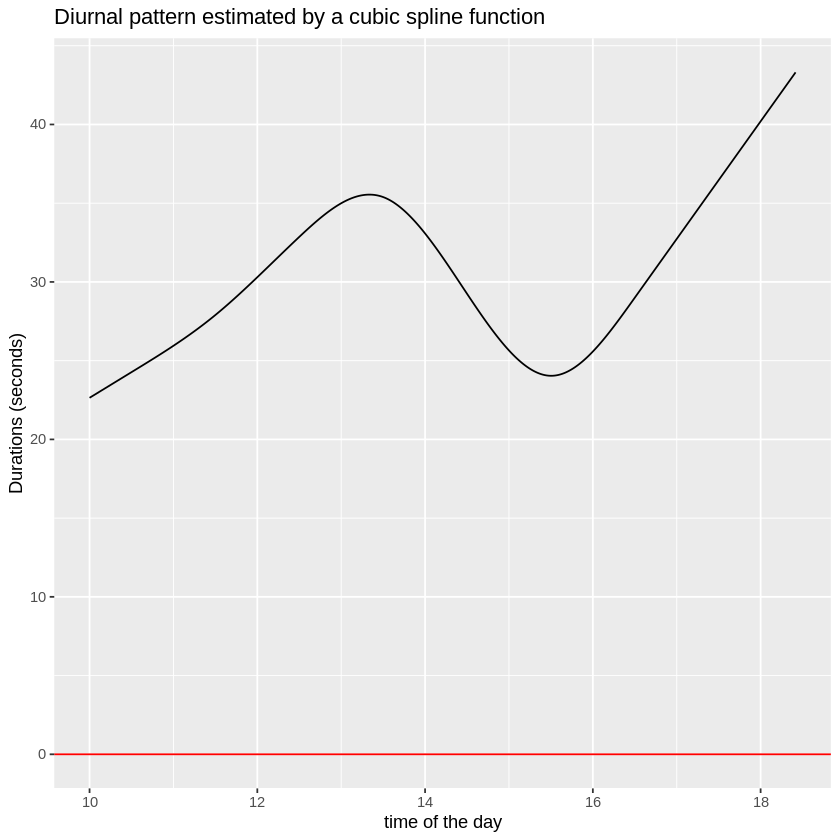

In [427]:
diurnalAdj(DurationsIBM)

Warning message in diurnalAdj(DurationsIBM, aggregation = "none"):
“no durations occured at the latest interval. Check if the 'node' argument is correctly specified”


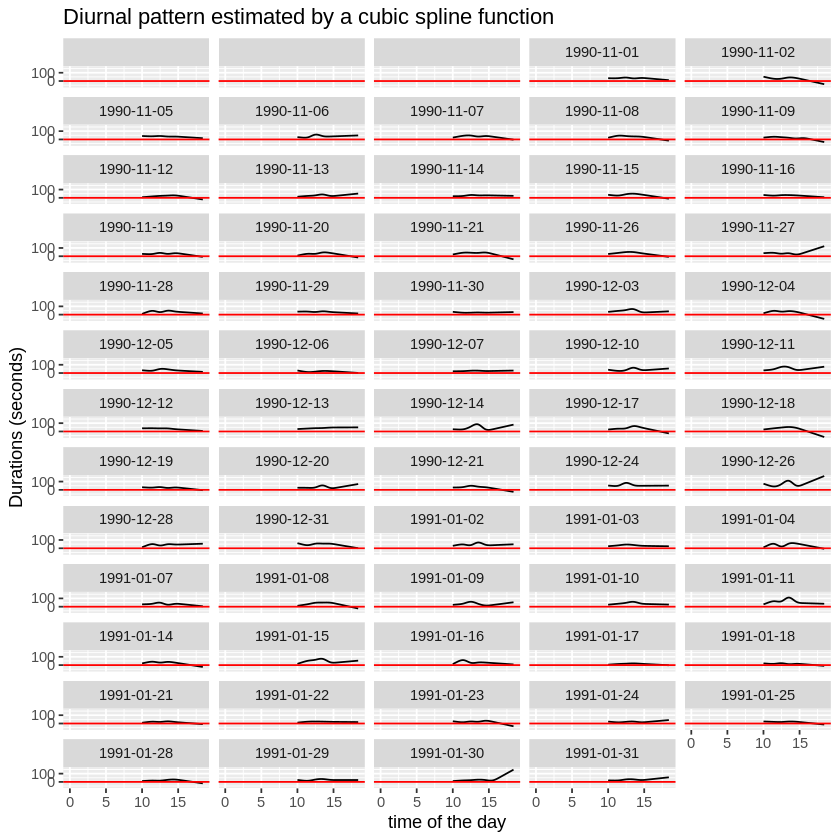

In [428]:
diurnalAdj(DurationsIBM, aggregation = "none")

Warning message in diurnalAdj(DurationsIBM, aggregation = "weekdays"):
“no durations occured at the latest interval. Check if the 'node' argument is correctly specified”


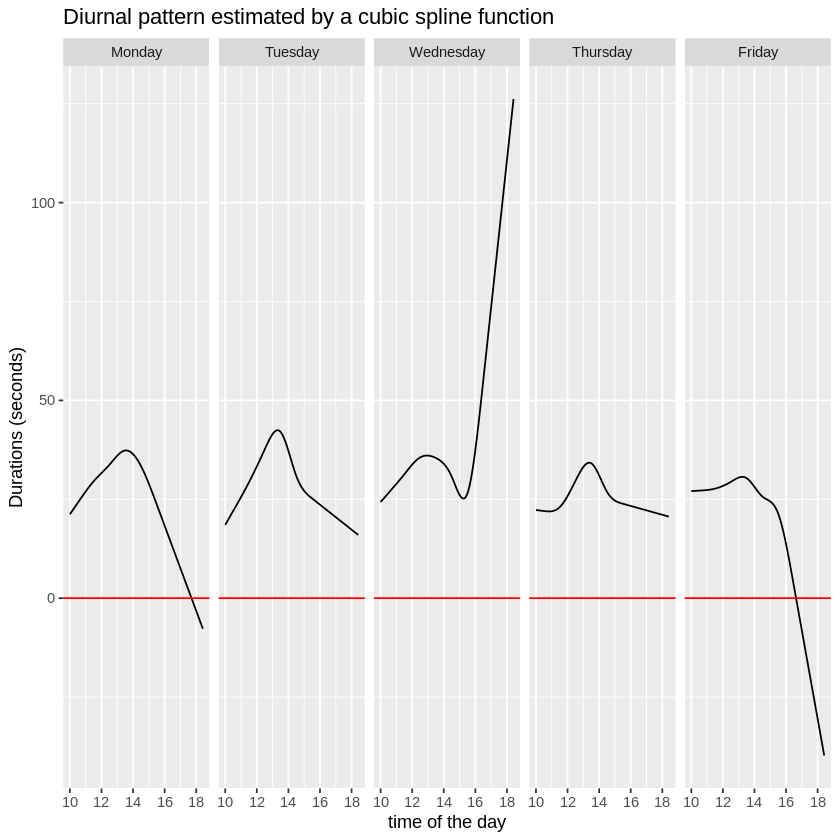

In [429]:
adjDurData <- diurnalAdj(DurationsIBM, aggregation = "weekdays")

Warning message in diurnalAdj(DurationsIBM, aggregation = "weekdays", method = "smoothSpline", :
“no durations occured at the latest interval. Check if the 'node' argument is correctly specified”


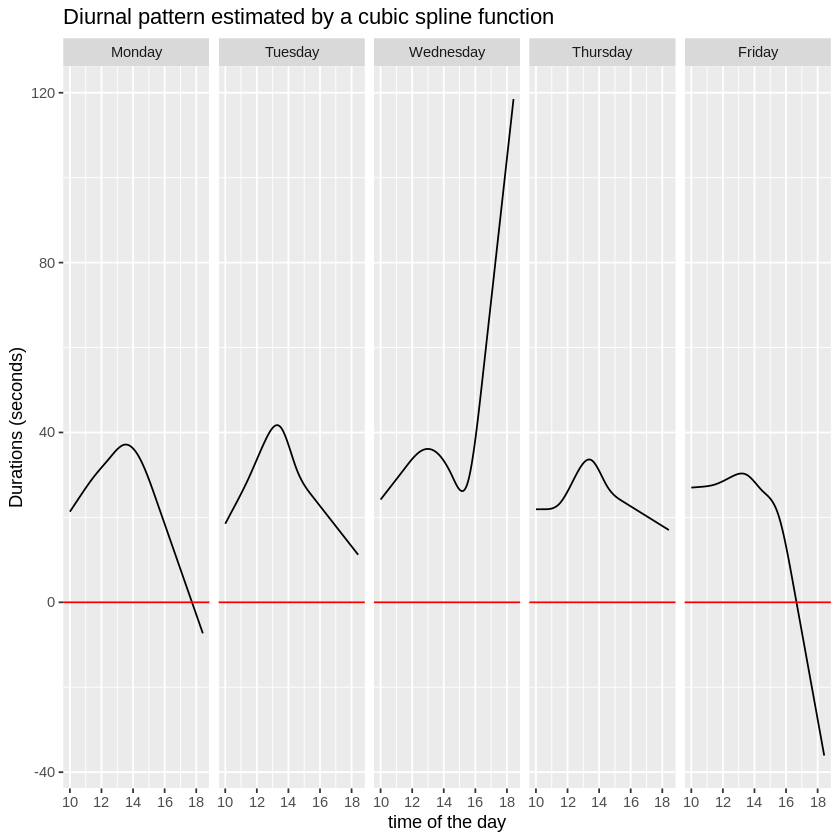

In [430]:
adjDurData <- diurnalAdj(DurationsIBM, aggregation = "weekdays",method="smoothSpline",spar=0.2)

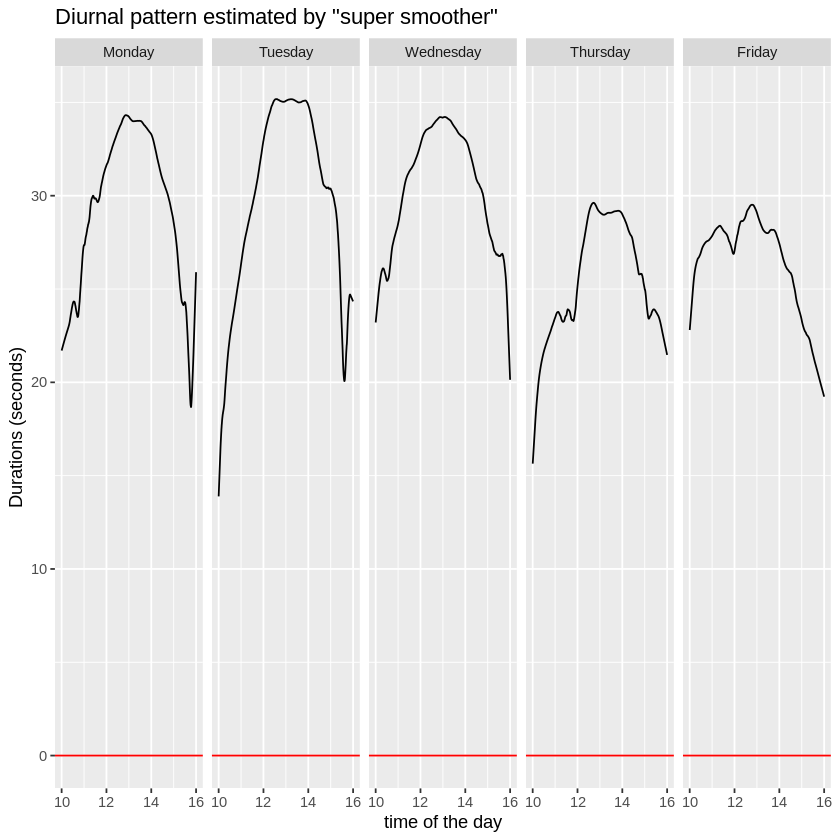

In [431]:
adjDurData <- diurnalAdj(DurationsIBM, aggregation = "weekdays",method="supsmu")

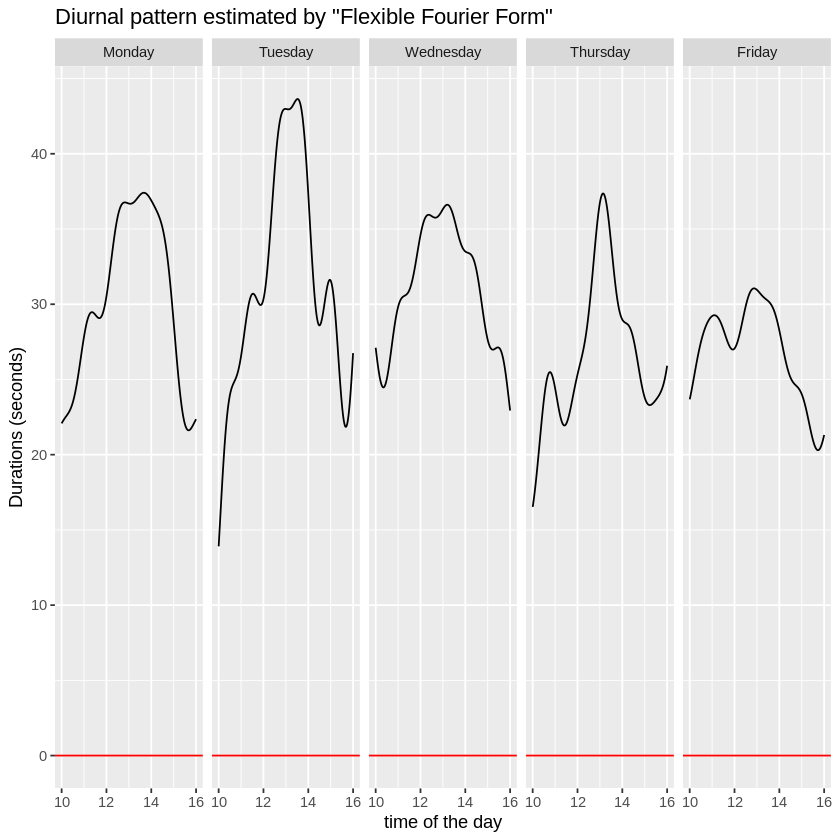

In [432]:
adjDurData <- diurnalAdj(DurationsIBM, aggregation = "weekdays",method="FFF",Q=5)

Warning message in diurnalAdj(DurationsIBM, aggregation = "all"):
“no durations occured at the latest interval. Check if the 'node' argument is correctly specified”


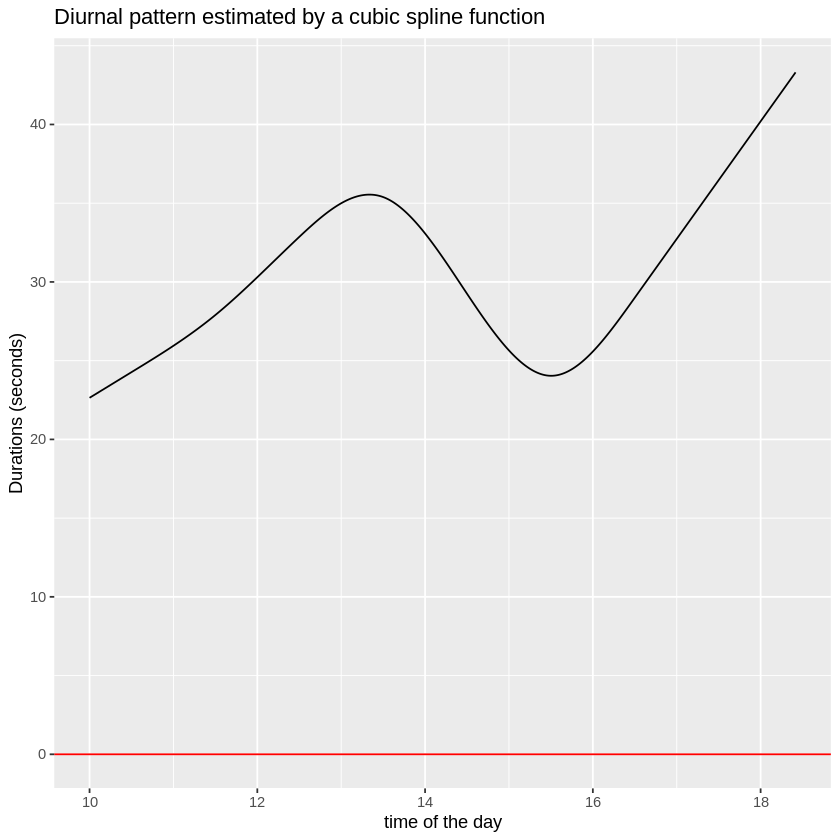

In [433]:
adjDurData <- diurnalAdj(DurationsIBM, aggregation = "all")

# Model EACD(1,1)

In [434]:
fitModel <- acdFit(durations =adjDurData, model = "ACD", dist = "exponential", order =c(1,1), dailyRestart = 1)


ACD model estimation by (Quasi) Maximum Likelihood 

Call:
  acdFit(durations = adjDurData, model = "ACD", dist = "exponential",      order = c(1, 1), dailyRestart = 1) 

Model:
  ACD(1, 1)

Distribution:
  exponential

N: 46120

Parameter estimate:
          Coef       SE PV robustSE
omega  0.00637 0.000616  0 0.000645
alpha1 0.06395 0.002165  0 0.001891
beta1  0.93081 0.002334  0 0.002141


The fixed/unfree mean distribution parameter: 
 lambda: 1

QML robust correlations:
        omega alpha1  beta1
omega   1.000  0.367 -0.652
alpha1  0.367  1.000 -0.927
beta1  -0.652 -0.927  1.000


Goodness of fit:
                      value
LogLikelihood -42393.380979
AIC            84792.761958
BIC            84818.978964
MSE                1.628837

Convergence: 0 

Number of log-likelihood function evaluations: 182 

Estimation time: 0.4925 secs 

Description: Estimated at 2020-11-26 14:57:34 by user root



`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



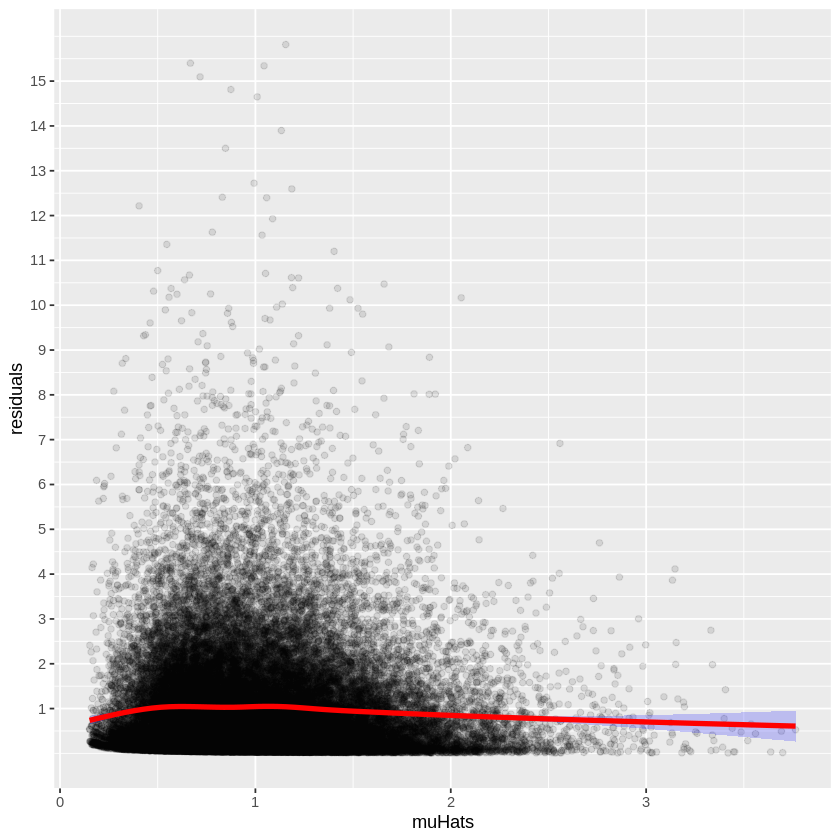

In [435]:
plotScatterAcd(fitModel, x = "muHats", y = "residuals", colour = NULL,
ylag = 0, xlim = NULL, ylim = NULL, alpha = 1/10, smoothMethod =
"auto")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



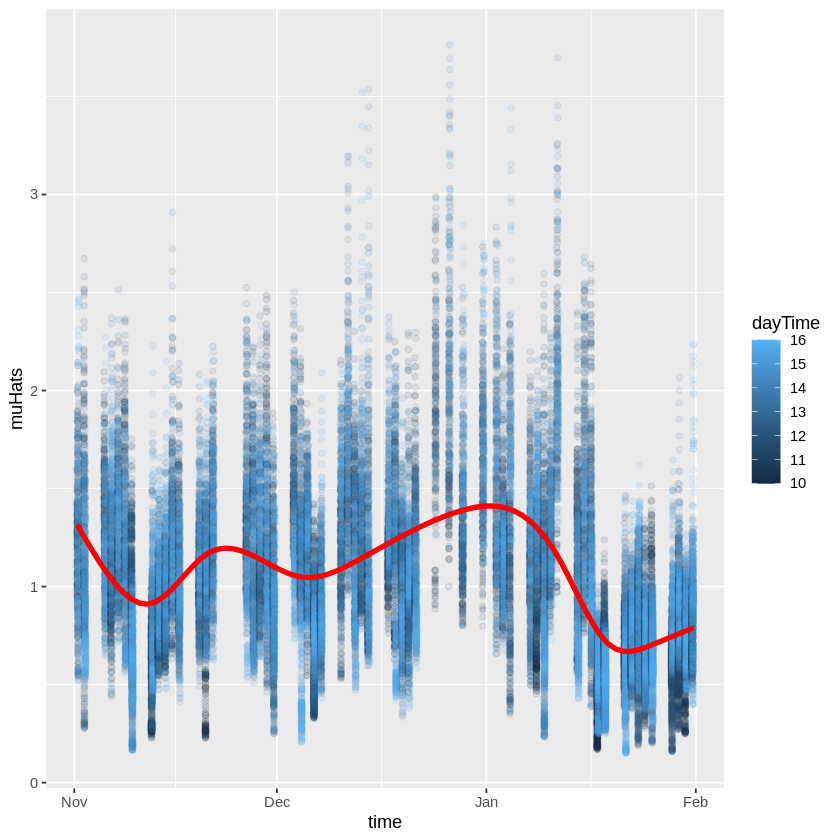

In [436]:
plotScatterAcd(fitModel, x = "time", y = "muHats", colour = "dayTime",
ylag = 0, xlim = NULL, ylim = NULL, alpha = 1/10, smoothMethod =
"auto")

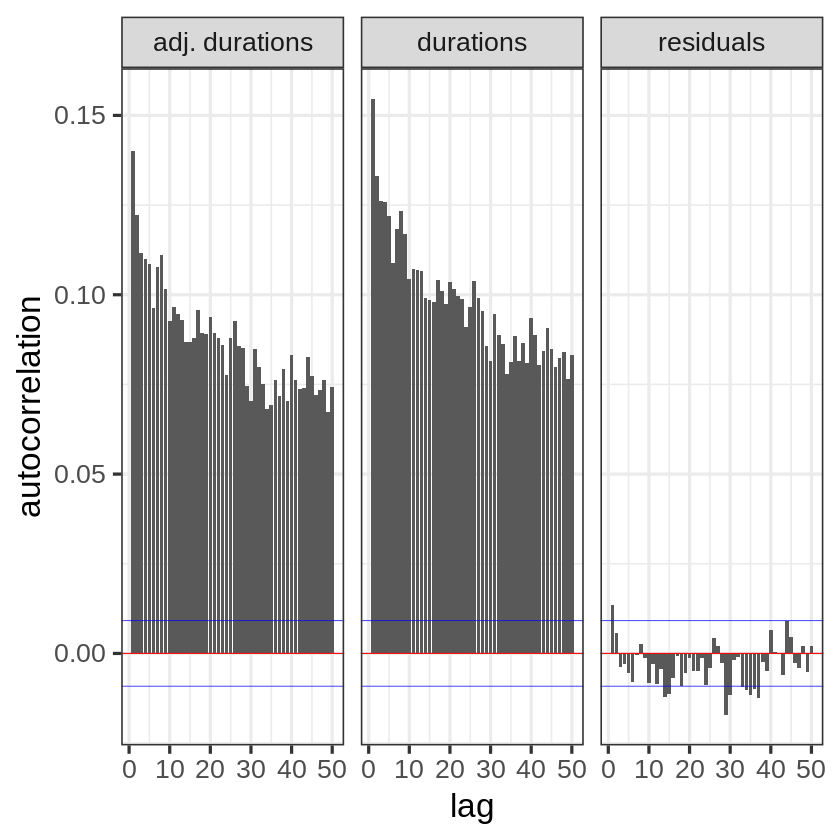

In [437]:
acf_acd(fitModel, conf_level = 0.95, max = 50)

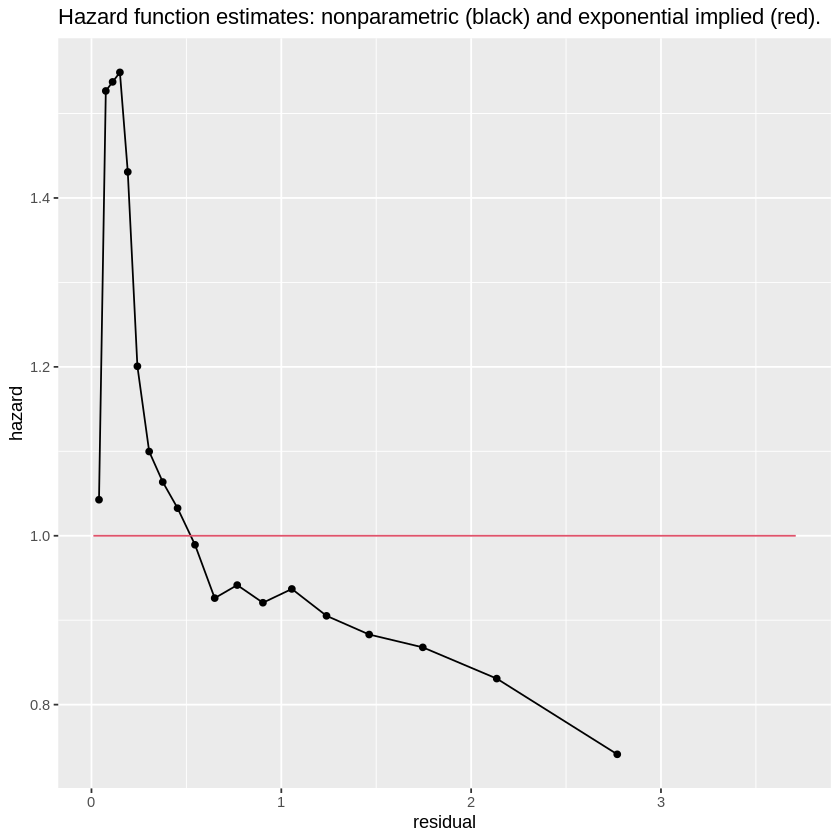

In [438]:
plotHazard(fitModel)

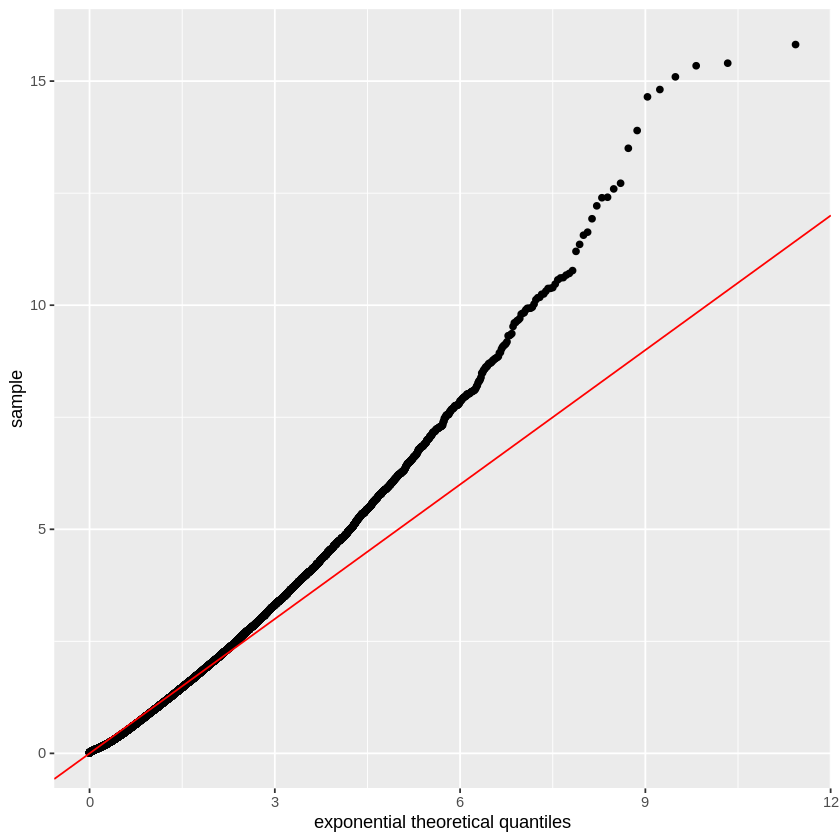

In [439]:
qqplotAcd(fitModel)

In [440]:
testRmACD(fitModel, pStar = 2, robust = TRUE)


M&T (2006) test of no remaining ACD in residuals (robust version): 
                                     
LM-stat:             46.7713053970292
Degrees of freedom:   2.0000000000000
P-value:              0.0000000000698


# Model WACD(1,1)

In [441]:
fitModel <- acdFit(durations =adjDurData, model = "ACD", dist = "weibull", order =c(1,1), dailyRestart = 1)


ACD model estimation by Maximum Likelihood 

Call:
  acdFit(durations = adjDurData, model = "ACD", dist = "weibull",      order = c(1, 1), dailyRestart = 1) 

Model:
  ACD(1, 1)

Distribution:
  weibull

N: 46120

Parameter estimate:
          Coef       SE PV
omega  0.00654 0.000681  0
alpha1 0.06399 0.002363  0
beta1  0.93034 0.002565  0
gamma  0.91243 0.003224  0

Note: The p-value for the distribution parameter gamma is from the 2-tailed test H0: gamma = 1.

The fixed/unfree mean distribution parameter: 
 theta: 1.040481

Goodness of fit:
                      value
LogLikelihood -42039.923592
AIC            84087.847183
BIC            84122.803191
MSE                1.628466

Convergence: 0 

Number of log-likelihood function evaluations: 279 

Estimation time: 2.4415 secs 

Description: Estimated at 2020-11-26 14:57:43 by user root



`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



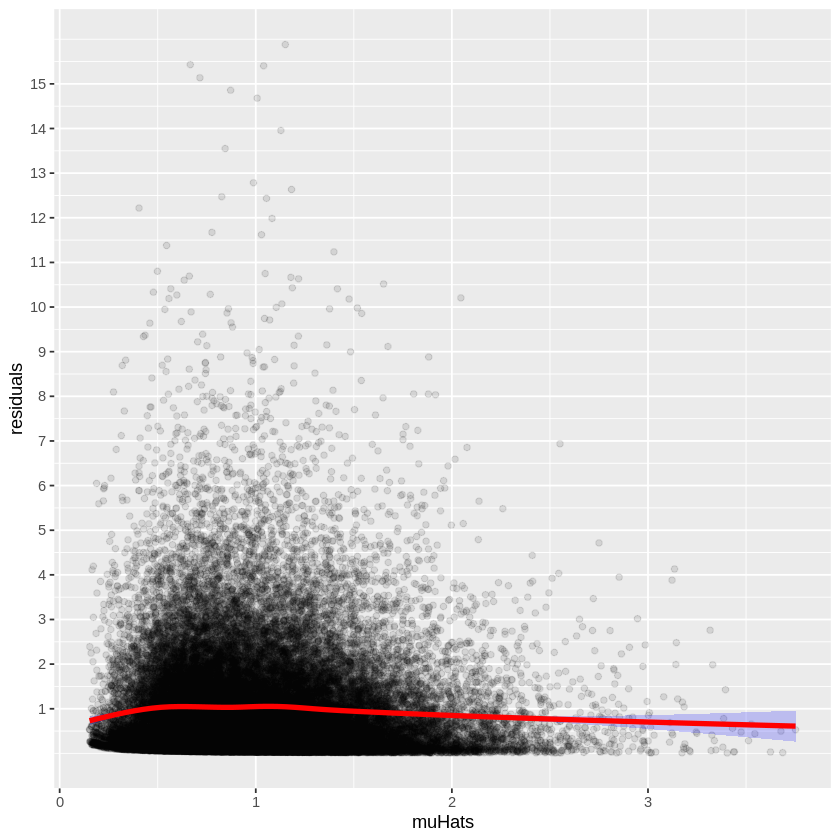

In [442]:
plotScatterAcd(fitModel, x = "muHats", y = "residuals", colour = NULL,
ylag = 0, xlim = NULL, ylim = NULL, alpha = 1/10, smoothMethod =
"auto")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



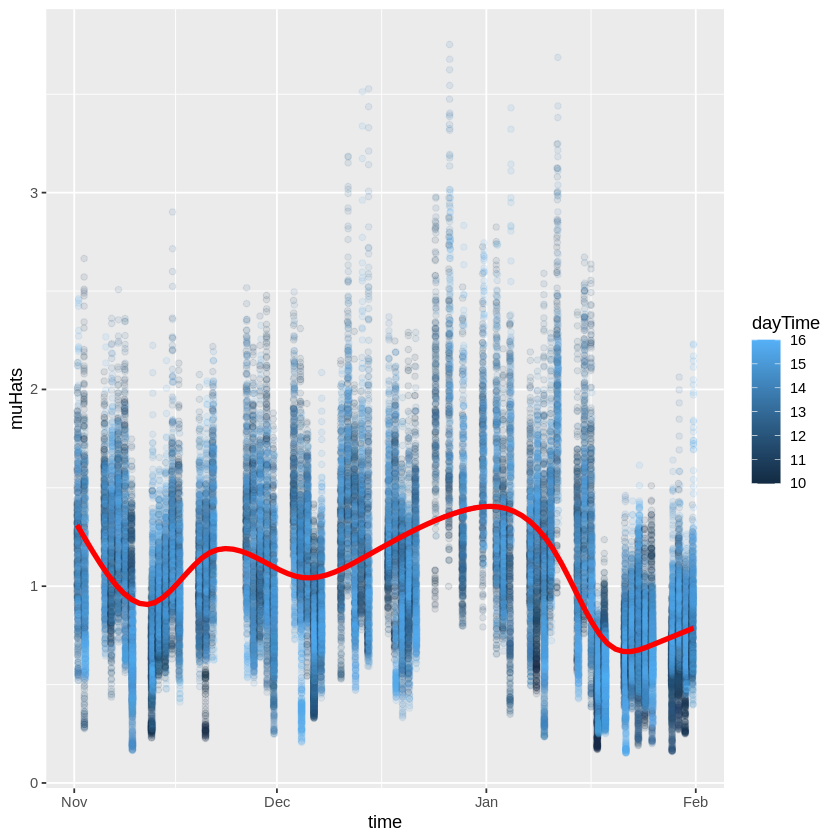

In [443]:
plotScatterAcd(fitModel, x = "time", y = "muHats", colour = "dayTime",
ylag = 0, xlim = NULL, ylim = NULL, alpha = 1/10, smoothMethod =
"auto")

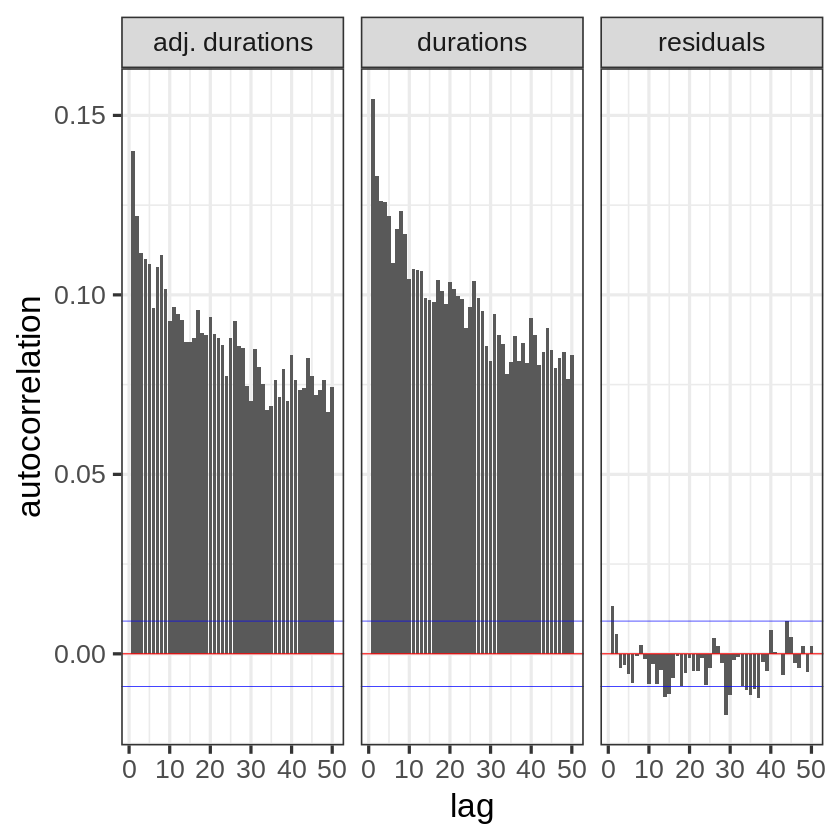

In [444]:
acf_acd(fitModel, conf_level = 0.95, max = 50)

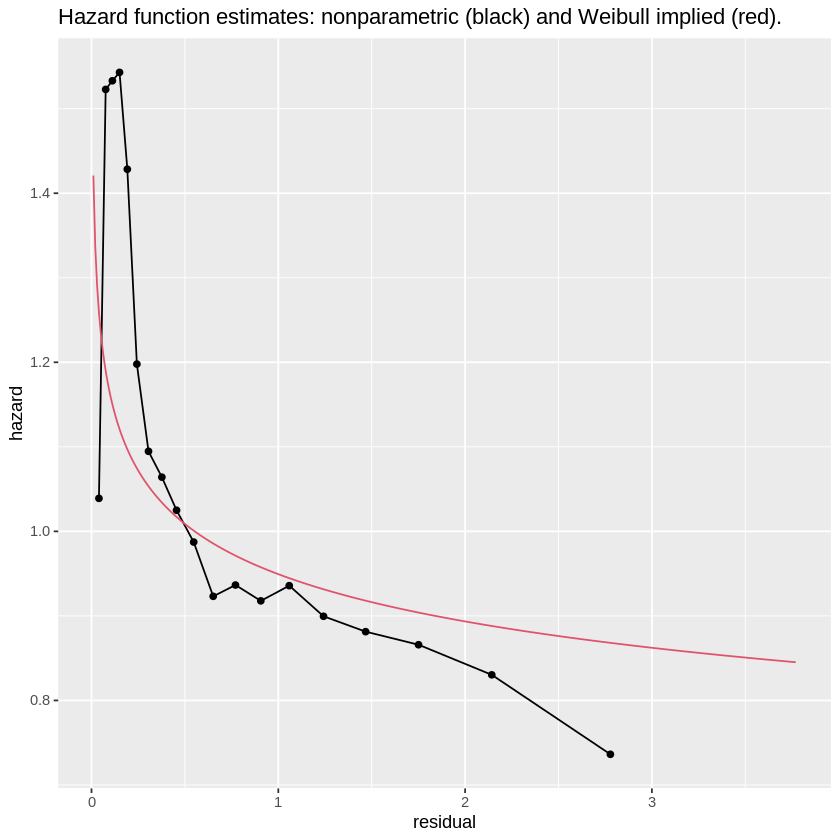

In [445]:
plotHazard(fitModel)

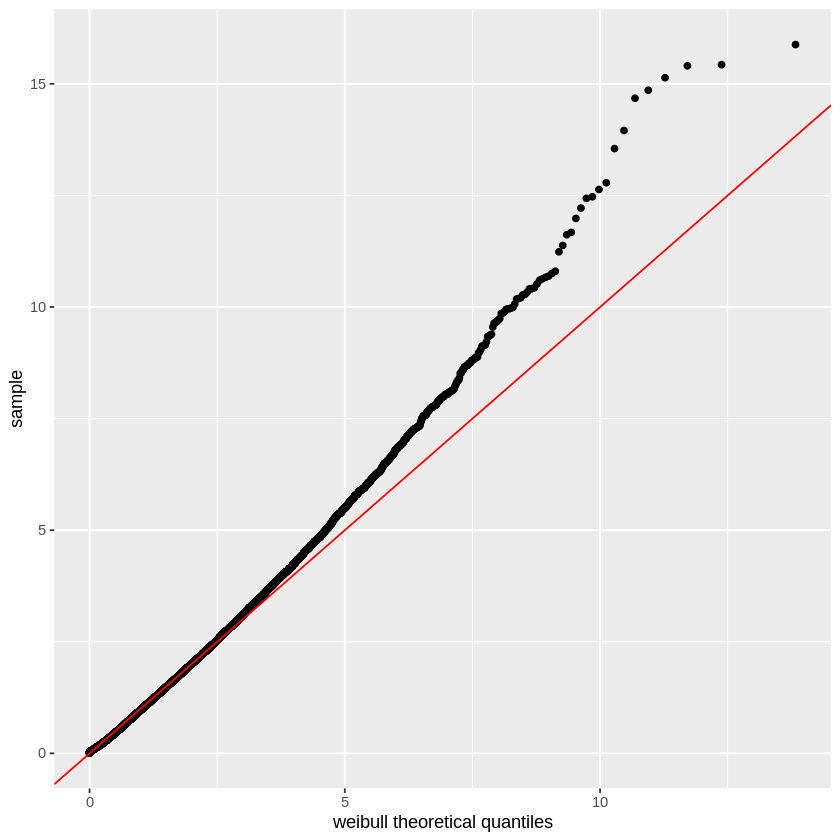

In [446]:
qqplotAcd(fitModel)

# Model GACD(1,1)

In [447]:
fitModel <- acdFit(durations =adjDurData, model = "ACD", dist = "gengamma", order =c(1,1), dailyRestart = 1)


ACD model estimation by Maximum Likelihood 

Call:
  acdFit(durations = adjDurData, model = "ACD", dist = "gengamma",      order = c(1, 1), dailyRestart = 1) 

Model:
  ACD(1, 1)

Distribution:
  gengamma

N: 46120

Parameter estimate:
          Coef       SE PV
omega  0.00867 0.000833  0
alpha1 0.06382 0.002527  0
beta1  0.92900 0.002818  0
kappa  4.93749 0.296147  0
gamma  0.38027 0.012095  0

Note: For the distribution parameters the null hypothesis is such that the parameter = 1 (2-sided). If the null is true, the generelized gamma distribution reduces to the exponential distribution

The fixed/unfree mean distribution parameter: 
 lambda: 0.0102429

Goodness of fit:
                      value
LogLikelihood -41241.567535
AIC            82493.135070
BIC            82536.830080
MSE                1.627812

Convergence: 0 

Number of log-likelihood function evaluations: 840 

Estimation time: 6.0155 secs 

Description: Estimated at 2020-11-26 14:57:55 by user root



`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



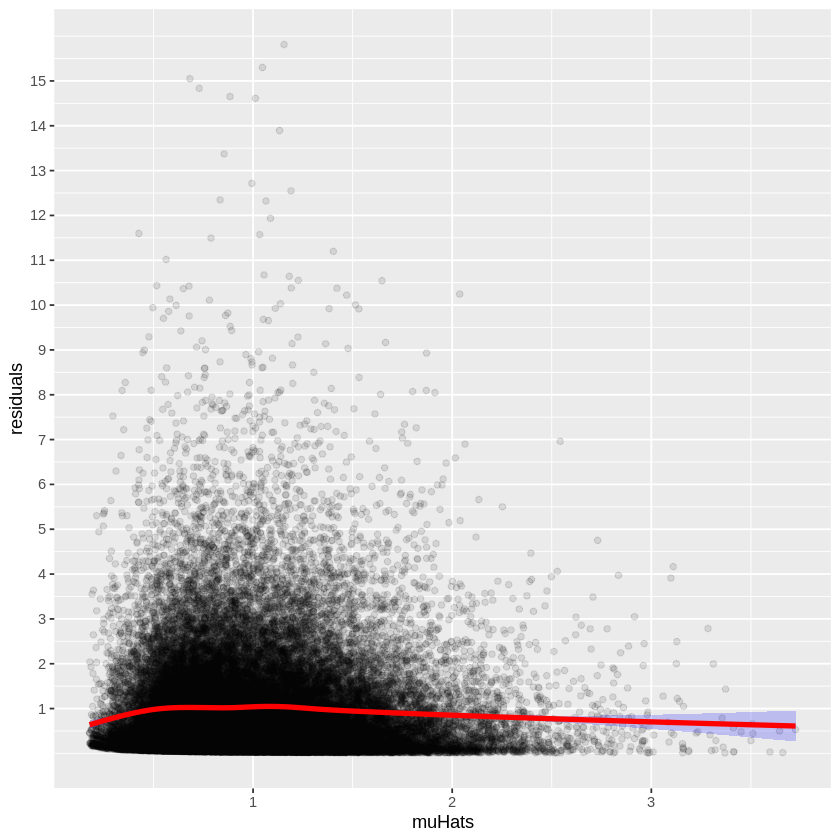

In [448]:
plotScatterAcd(fitModel, x = "muHats", y = "residuals", colour = NULL,
ylag = 0, xlim = NULL, ylim = NULL, alpha = 1/10, smoothMethod =
"auto")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



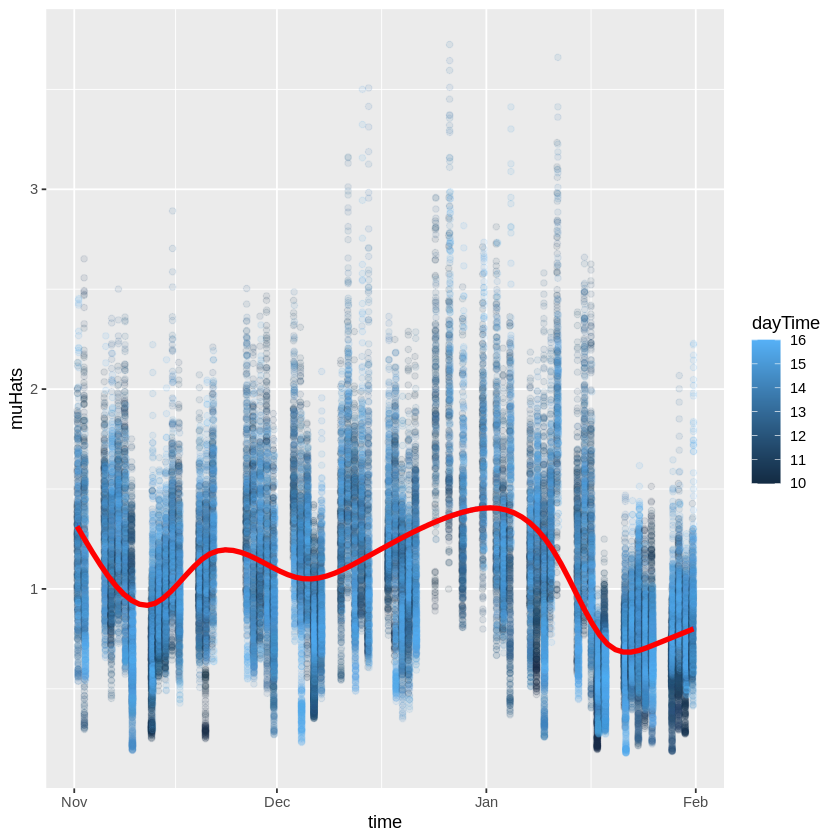

In [449]:
plotScatterAcd(fitModel, x = "time", y = "muHats", colour = "dayTime",
ylag = 0, xlim = NULL, ylim = NULL, alpha = 1/10, smoothMethod =
"auto")

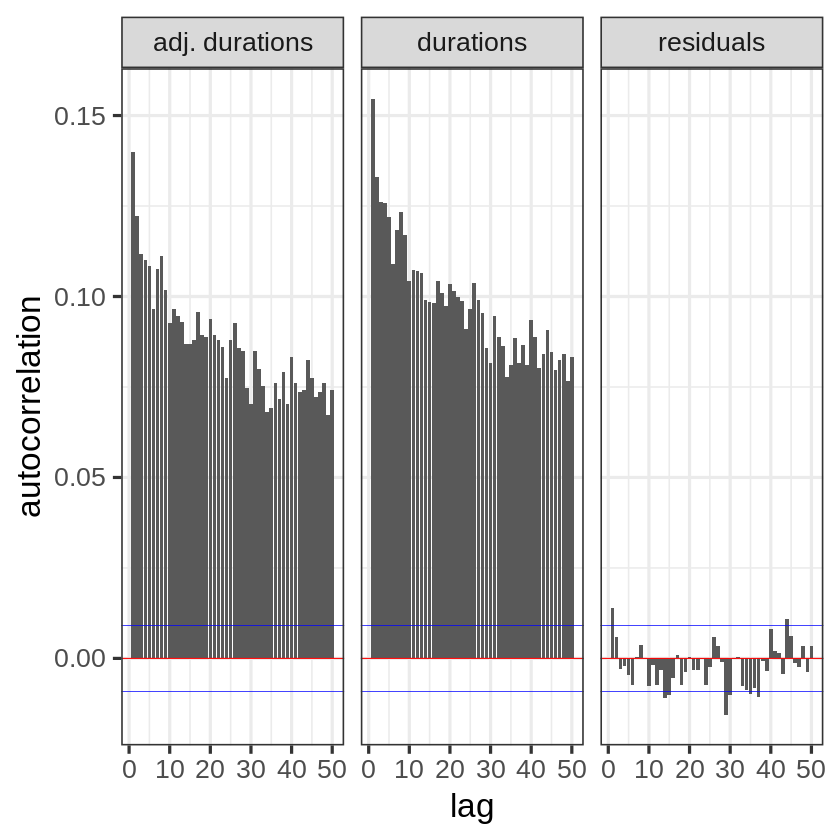

In [450]:
acf_acd(fitModel, conf_level = 0.95, max = 50)

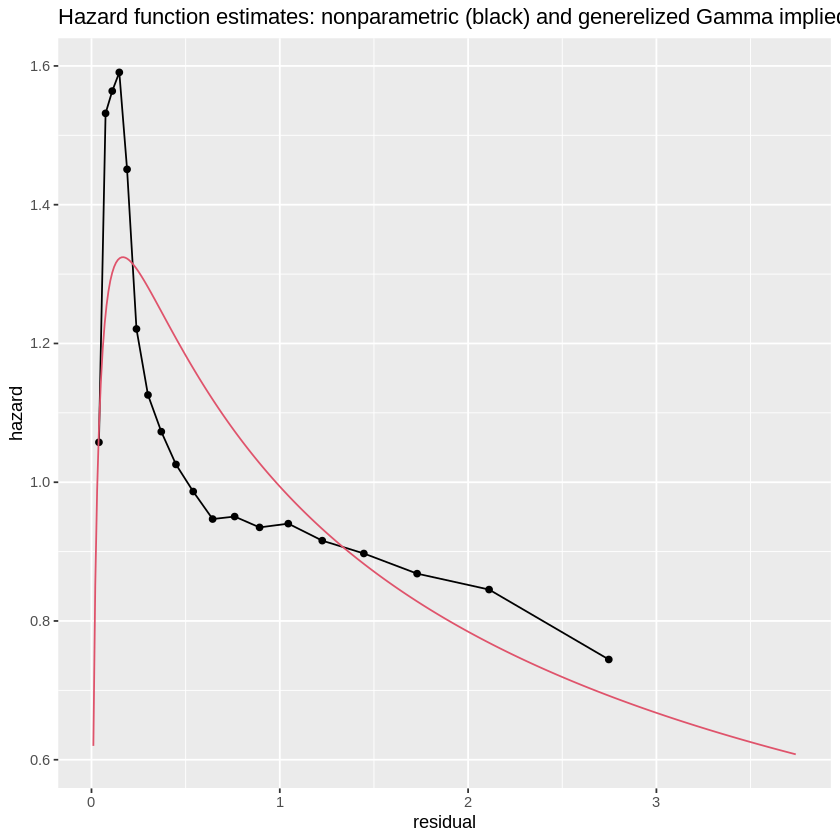

In [451]:
plotHazard(fitModel)

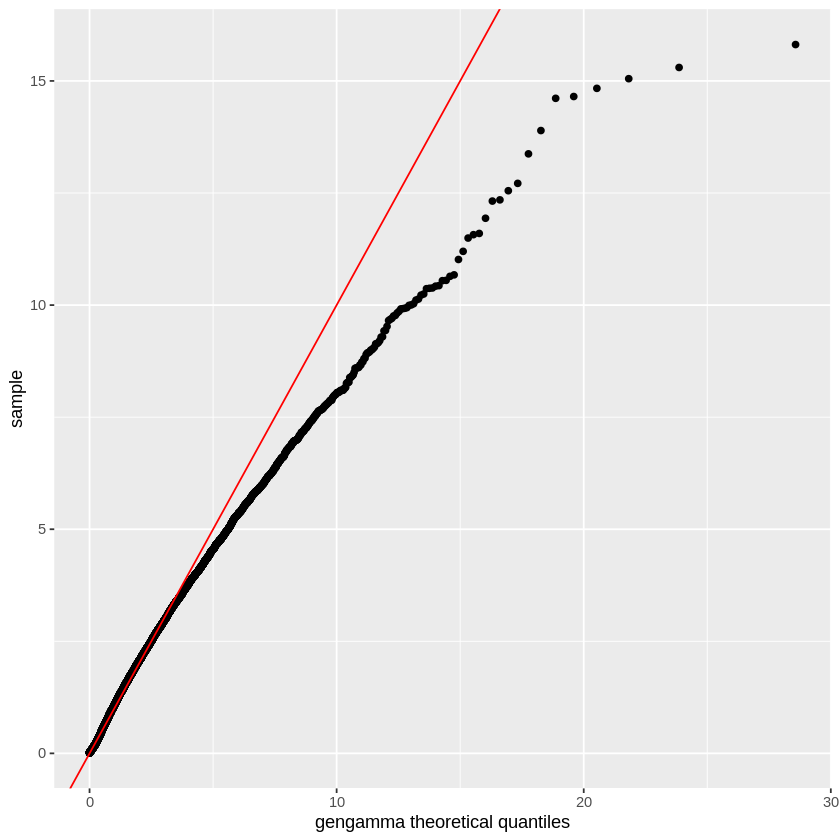

In [452]:
qqplotAcd(fitModel)

# Model LACD1(1,1)

In [453]:
fitModel <- acdFit(durations =adjDurData, model = "LACD1", dist = "weibull", order =c(1,1), dailyRestart = 1)


ACD model estimation by Maximum Likelihood 

Call:
  acdFit(durations = adjDurData, model = "LACD1", dist = "weibull",      order = c(1, 1), dailyRestart = 1) 

Model:
  LACD1(1, 1)

Distribution:
  weibull

N: 46120

Parameter estimate:
         Coef       SE PV
omega  0.0354 0.001268  0
alpha1 0.0562 0.001951  0
beta1  0.9916 0.000975  0
gamma  0.9107 0.003209  0

Note: The p-value for the distribution parameter gamma is from the 2-tailed test H0: gamma = 1.

The fixed/unfree mean distribution parameter: 
 theta: 1.041366

Goodness of fit:
                      value
LogLikelihood -42035.225862
AIC            84078.451724
BIC            84113.407732
MSE                1.624296

Convergence: 0 

Number of log-likelihood function evaluations: 139 

Estimation time: 2.0617 secs 

Description: Estimated at 2020-11-26 14:58:11 by user root



`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



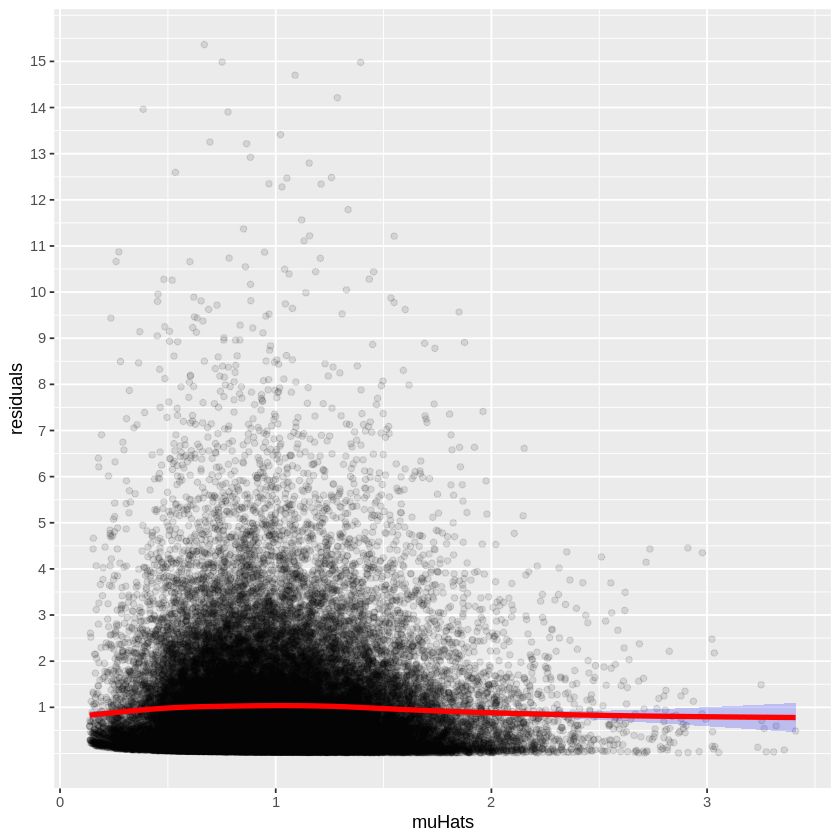

In [454]:
plotScatterAcd(fitModel, x = "muHats", y = "residuals", colour = NULL,
ylag = 0, xlim = NULL, ylim = NULL, alpha = 1/10, smoothMethod =
"auto")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



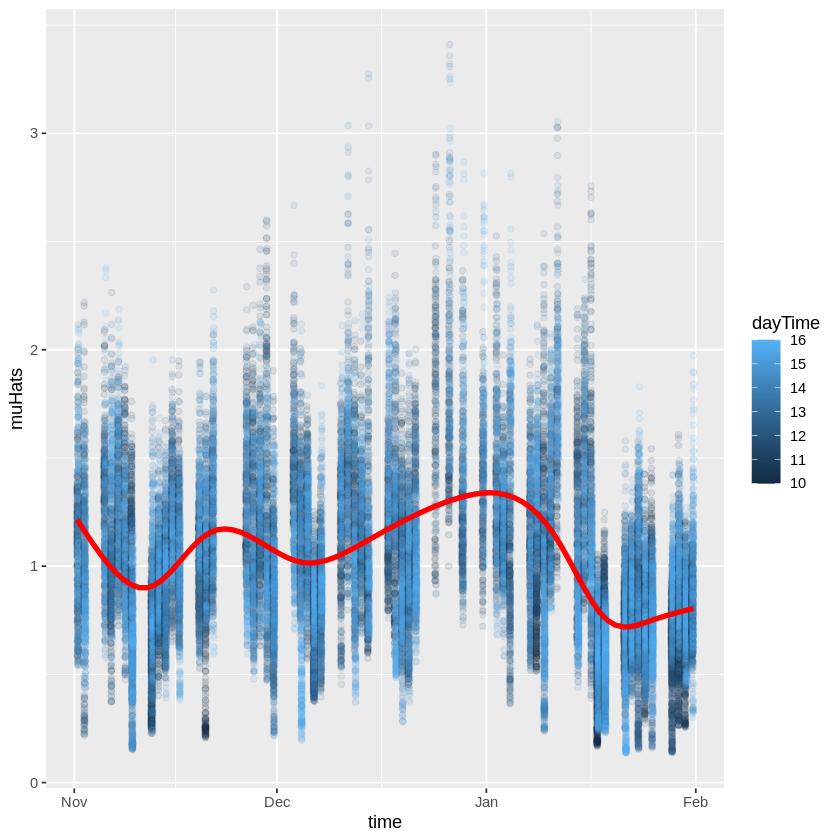

In [455]:
plotScatterAcd(fitModel, x = "time", y = "muHats", colour = "dayTime",
ylag = 0, xlim = NULL, ylim = NULL, alpha = 1/10, smoothMethod =
"auto")

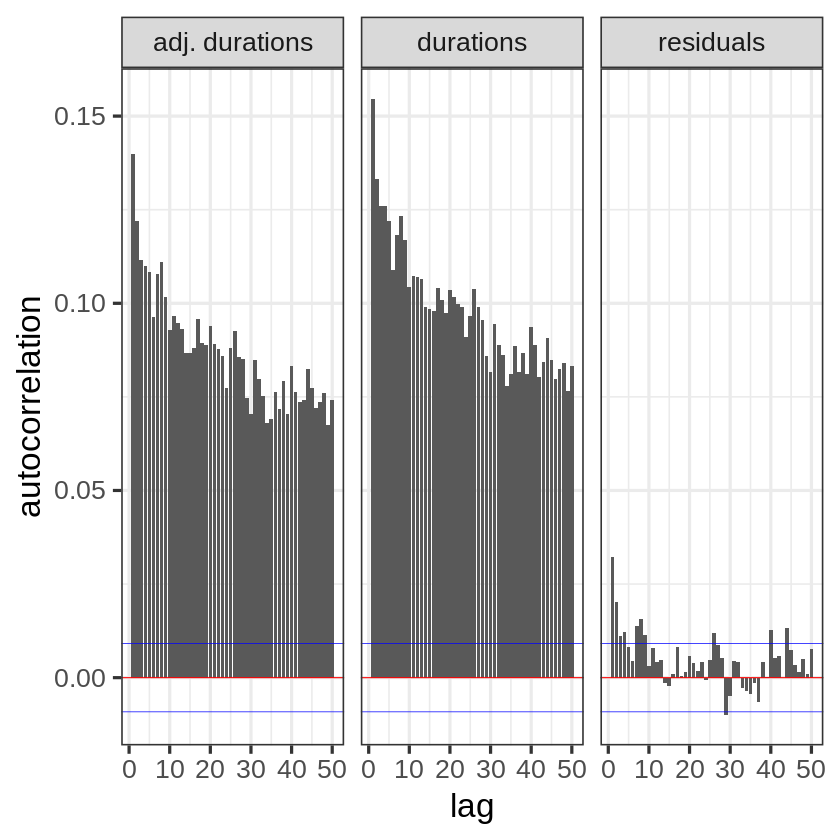

In [456]:
acf_acd(fitModel, conf_level = 0.95, max = 50)

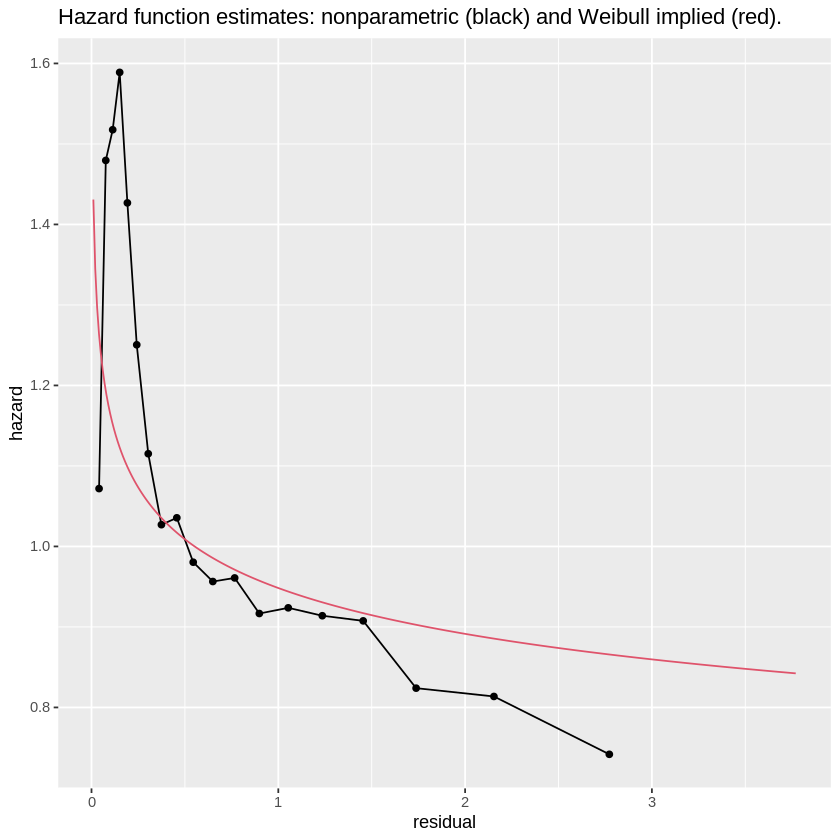

In [457]:
plotHazard(fitModel)

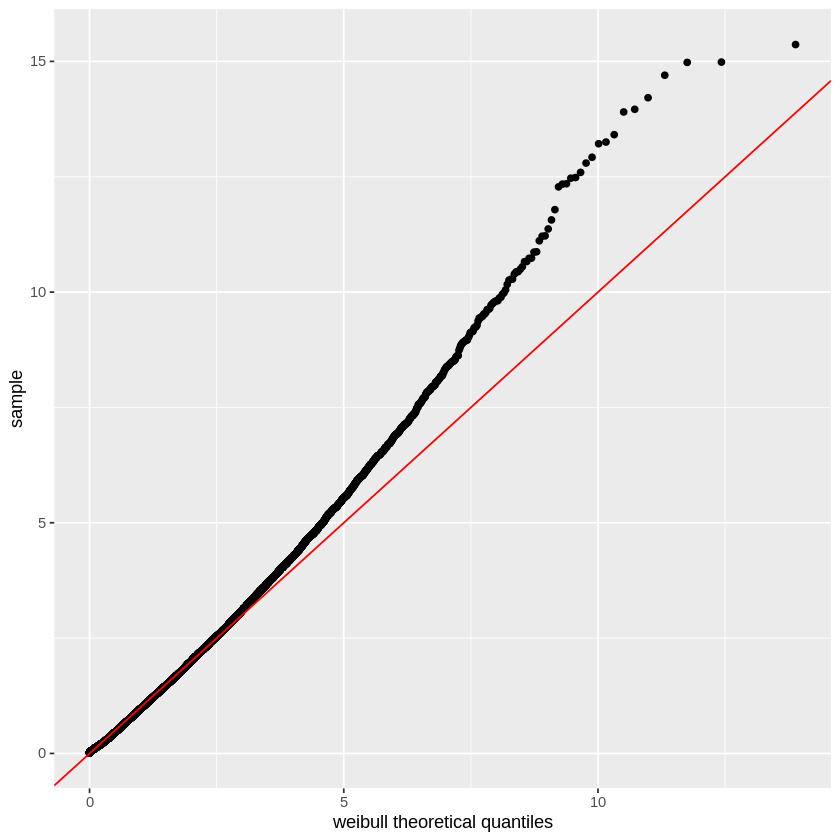

In [458]:
qqplotAcd(fitModel)

# Model AMACD(1,1,2)

In [460]:
fitModel <- acdFit(durations =adjDurData, model = "AMACD", dist = "weibull", order =c(1,1,2), dailyRestart = 1)


ACD model estimation by Maximum Likelihood 

Call:
  acdFit(durations = adjDurData, model = "AMACD", dist = "weibull",      order = c(1, 1, 2), dailyRestart = 1) 

Model:
  AMACD(1, 1, 2)

Distribution:
  weibull

N: 46120

Parameter estimate:
          Coef      SE PV
omega  -0.0326 0.00336  0
alpha1  0.0169 0.00451  0
nu1     0.0481 0.00409  0
beta1   0.7544 0.05628  0
beta2   0.2129 0.05493  0
gamma   0.9151 0.00323  0

Note: The p-value for the distribution parameter gamma is from the 2-tailed test H0: gamma = 1.

The fixed/unfree mean distribution parameter: 
 theta: 1.039144

Goodness of fit:
                     value
LogLikelihood -41937.50291
AIC            83887.00582
BIC            83939.43983
MSE                1.61908

Convergence: 0 

Number of log-likelihood function evaluations: 605 

Estimation time: 5.4364 secs 

Description: Estimated at 2020-11-26 14:58:22 by user root



`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



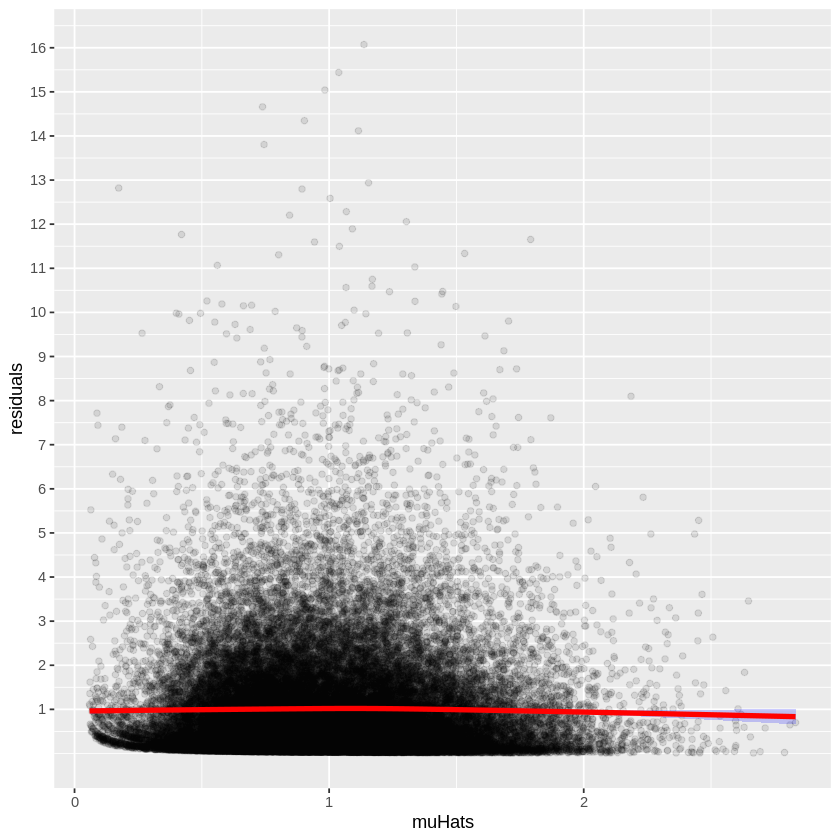

In [461]:
plotScatterAcd(fitModel, x = "muHats", y = "residuals", colour = NULL,
ylag = 0, xlim = NULL, ylim = NULL, alpha = 1/10, smoothMethod =
"auto")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



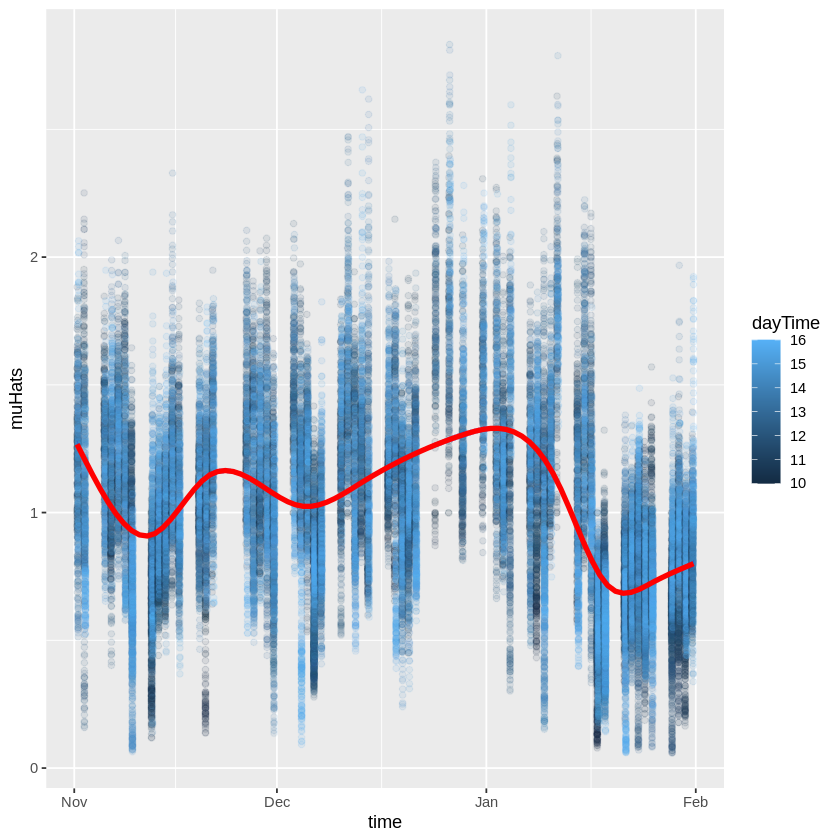

In [462]:
plotScatterAcd(fitModel, x = "time", y = "muHats", colour = "dayTime",
ylag = 0, xlim = NULL, ylim = NULL, alpha = 1/10, smoothMethod =
"auto")

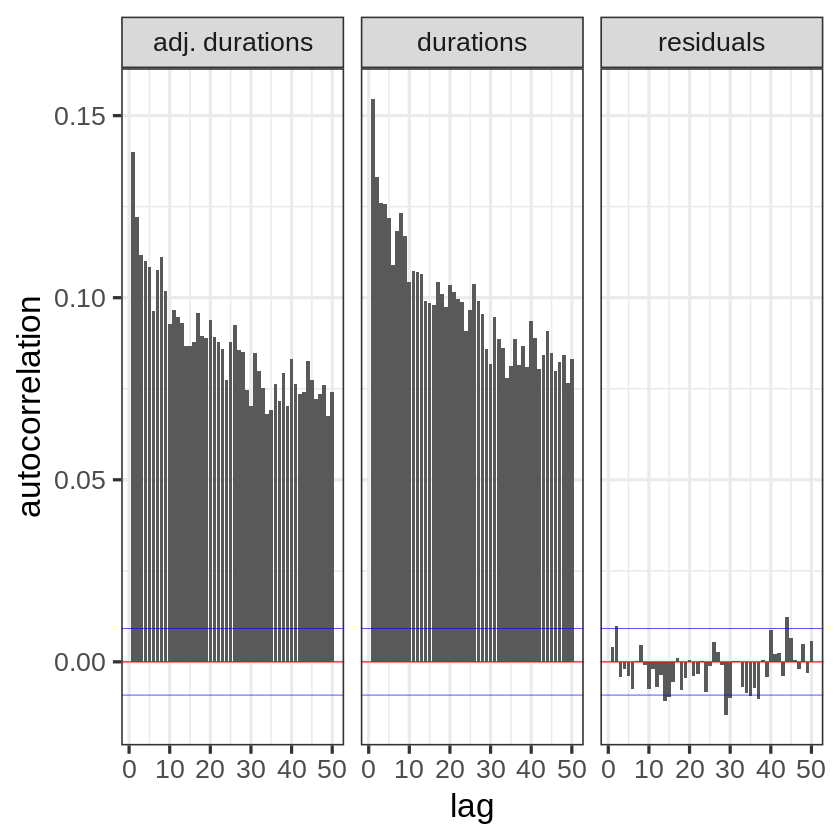

In [463]:
acf_acd(fitModel, conf_level = 0.95, max = 50)

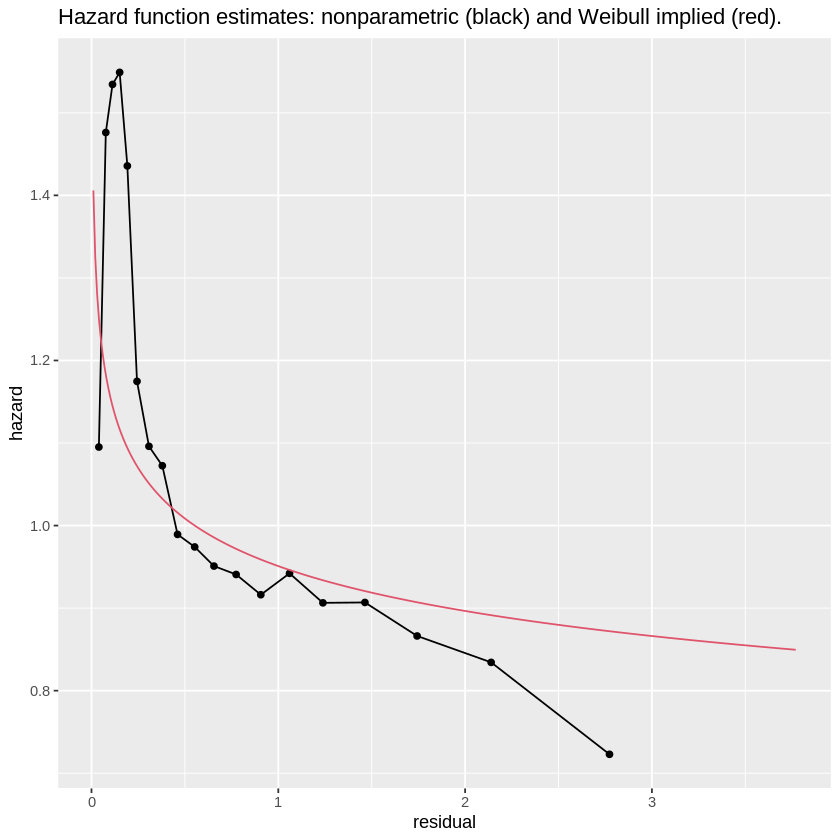

In [464]:
plotHazard(fitModel)

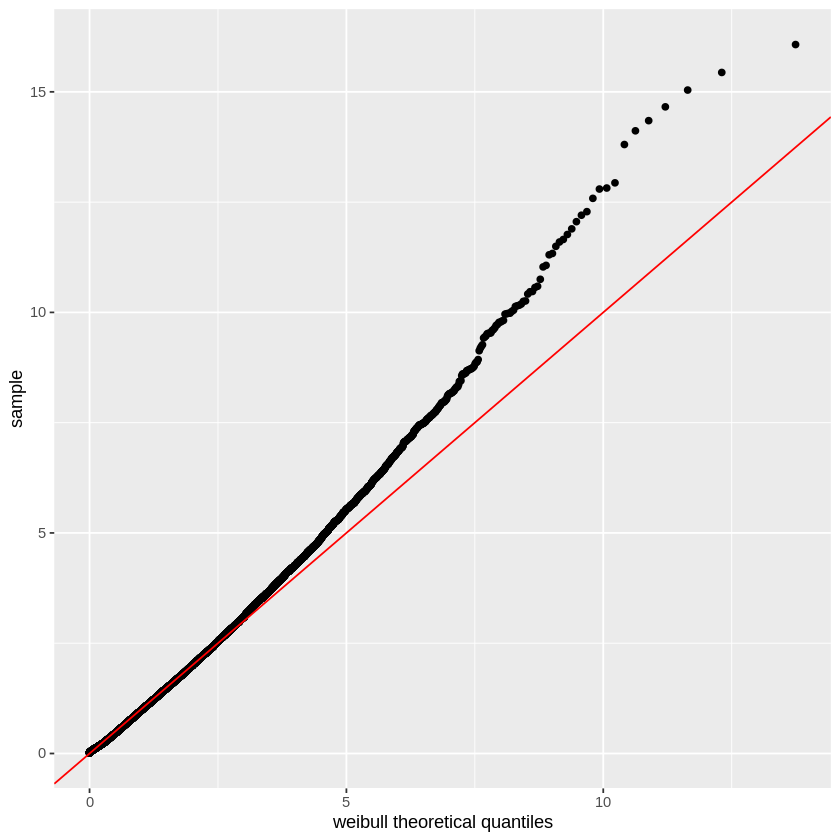

In [465]:
qqplotAcd(fitModel)

# Model LACD2(1,1)

In [466]:
fitModel <- acdFit(durations =adjDurData, model = "LACD2", dist = "weibull", order =c(1,1), dailyRestart = 1)


ACD model estimation by Maximum Likelihood 

Call:
  acdFit(durations = adjDurData, model = "LACD2", dist = "weibull",      order = c(1, 1), dailyRestart = 1) 

Model:
  LACD2(1, 1)

Distribution:
  weibull

N: 46120

Parameter estimate:
          Coef      SE PV
omega  -0.0603 0.00207  0
alpha1  0.0590 0.00204  0
beta1   0.9888 0.00101  0
gamma   0.9121 0.00322  0

Note: The p-value for the distribution parameter gamma is from the 2-tailed test H0: gamma = 1.

The fixed/unfree mean distribution parameter: 
 theta: 1.040636

Goodness of fit:
                      value
LogLikelihood -42050.808259
AIC            84109.616519
BIC            84144.572527
MSE                1.627387

Convergence: 0 

Number of log-likelihood function evaluations: 253 

Estimation time: 2.6626 secs 

Description: Estimated at 2020-11-26 14:58:37 by user root



`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



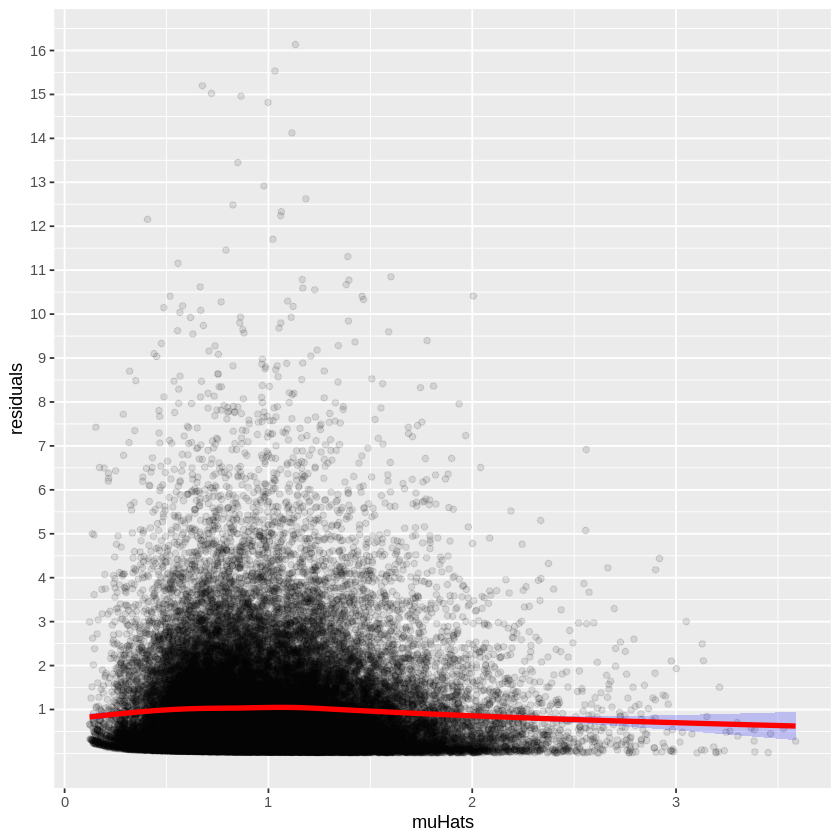

In [467]:
plotScatterAcd(fitModel, x = "muHats", y = "residuals", colour = NULL,
ylag = 0, xlim = NULL, ylim = NULL, alpha = 1/10, smoothMethod =
"auto")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



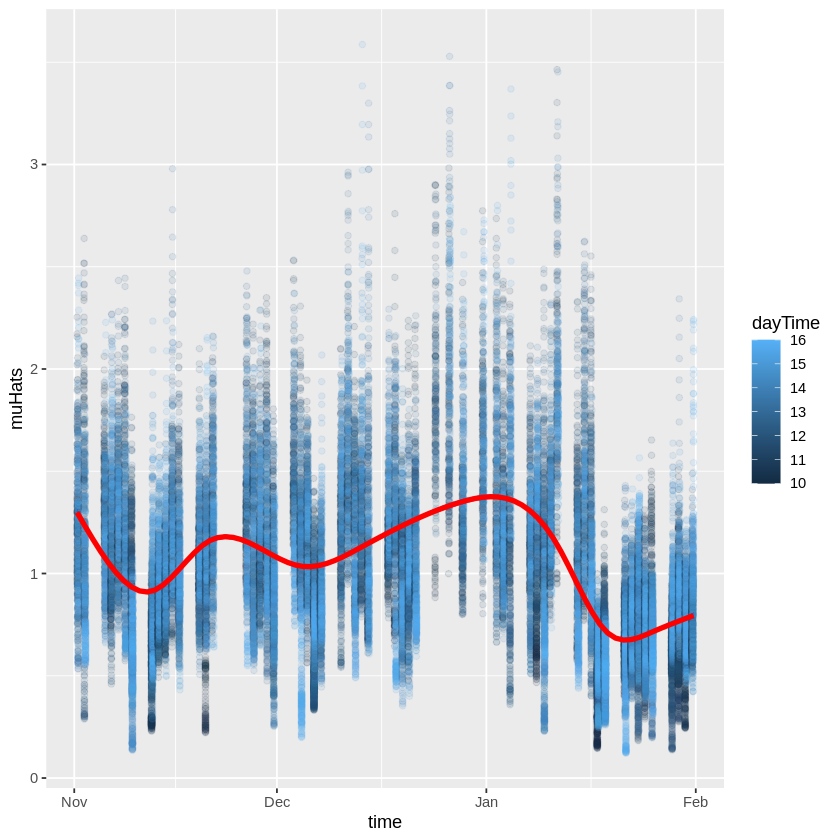

In [468]:
plotScatterAcd(fitModel, x = "time", y = "muHats", colour = "dayTime",
ylag = 0, xlim = NULL, ylim = NULL, alpha = 1/10, smoothMethod =
"auto")

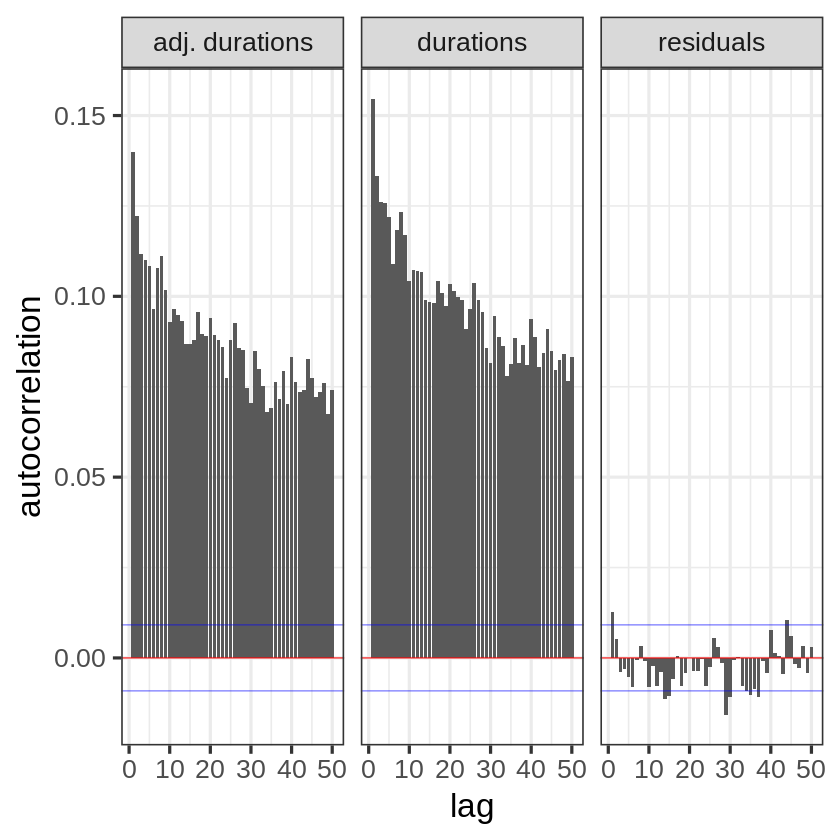

In [469]:
acf_acd(fitModel, conf_level = 0.95, max = 50)

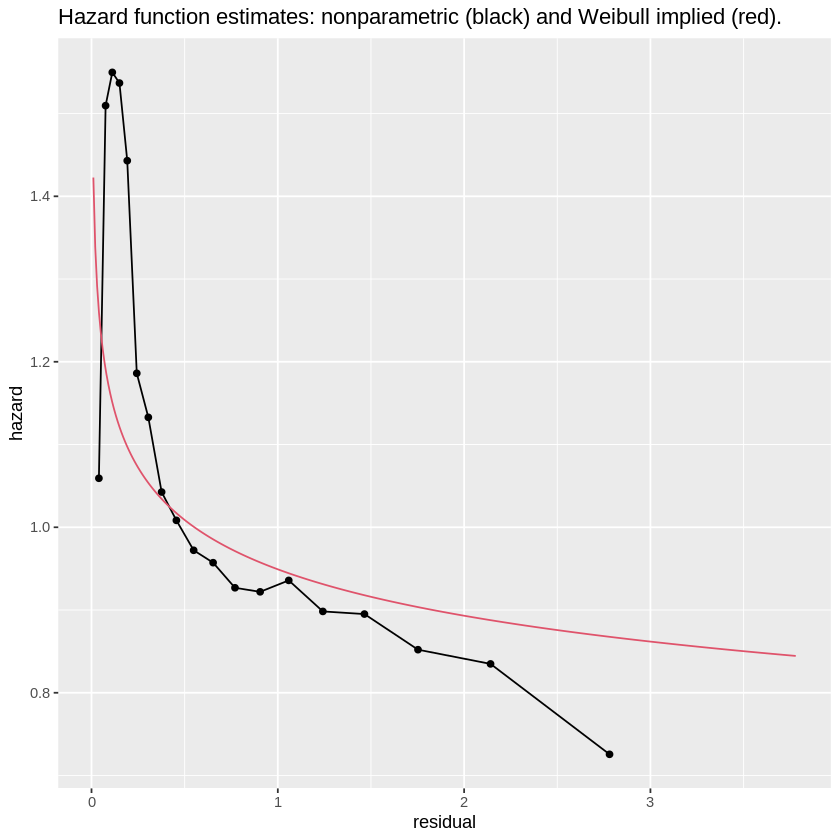

In [470]:
plotHazard(fitModel)

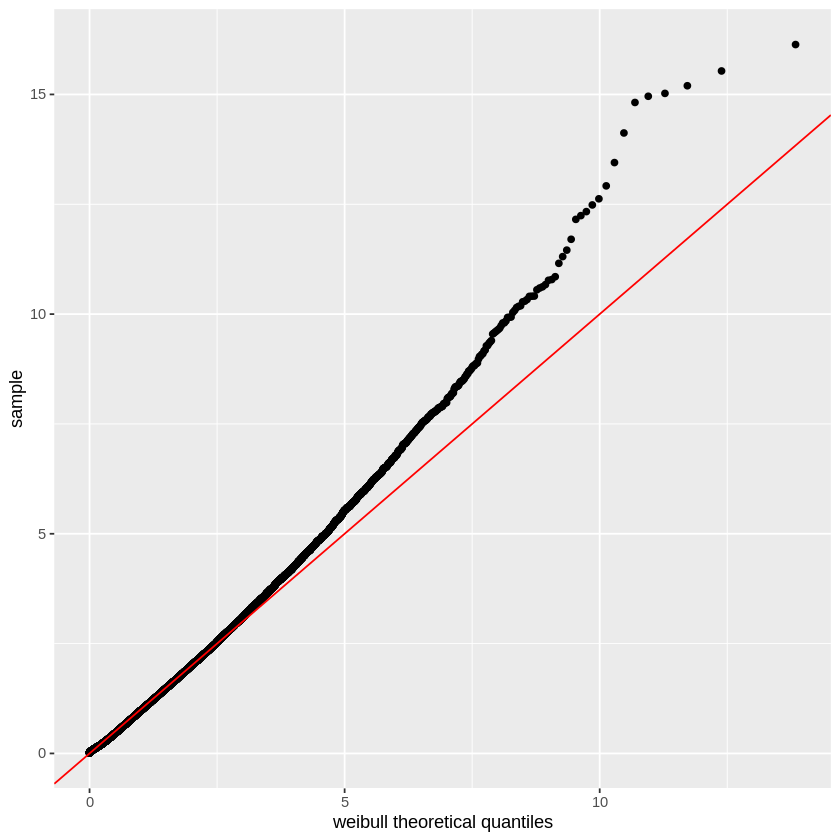

In [471]:
qqplotAcd(fitModel)

# Model BACD(1,1)

In [472]:
fitModel <- acdFit(durations =adjDurData, model = "BACD", dist = "weibull", order =c(1,1), dailyRestart = 1)


ACD model estimation by Maximum Likelihood 

Call:
  acdFit(durations = adjDurData, model = "BACD", dist = "weibull",      order = c(1, 1), dailyRestart = 1) 

Model:
  BACD(1, 1)

Distribution:
  weibull

N: 46120

Parameter estimate:
         Coef      SE PV
omega  -0.097 0.00968  0
alpha1  0.125 0.01090  0
beta1   0.989 0.00117  0
delta1  0.858 0.05505  0
delta2  0.432 0.03268  0
gamma   0.916 0.00323  0

Note: The p-value for the distribution parameter gamma is from the 2-tailed test H0: gamma = 1.

The fixed/unfree mean distribution parameter: 
 theta: 1.038526

Goodness of fit:
                      value
LogLikelihood -41826.908779
AIC            83665.817558
BIC            83718.251570
MSE                1.615323

Convergence: 0 

Number of log-likelihood function evaluations: 521 

Estimation time: 9.2493 secs 

Description: Estimated at 2020-11-26 14:58:49 by user root



`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



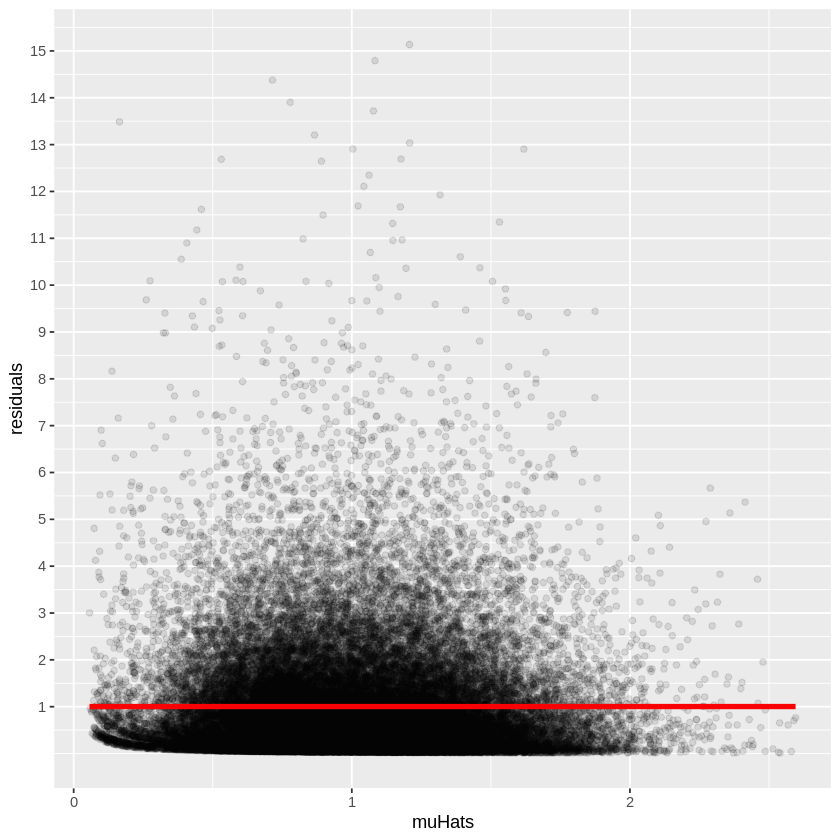

In [473]:
plotScatterAcd(fitModel, x = "muHats", y = "residuals", colour = NULL,
ylag = 0, xlim = NULL, ylim = NULL, alpha = 1/10, smoothMethod =
"auto")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



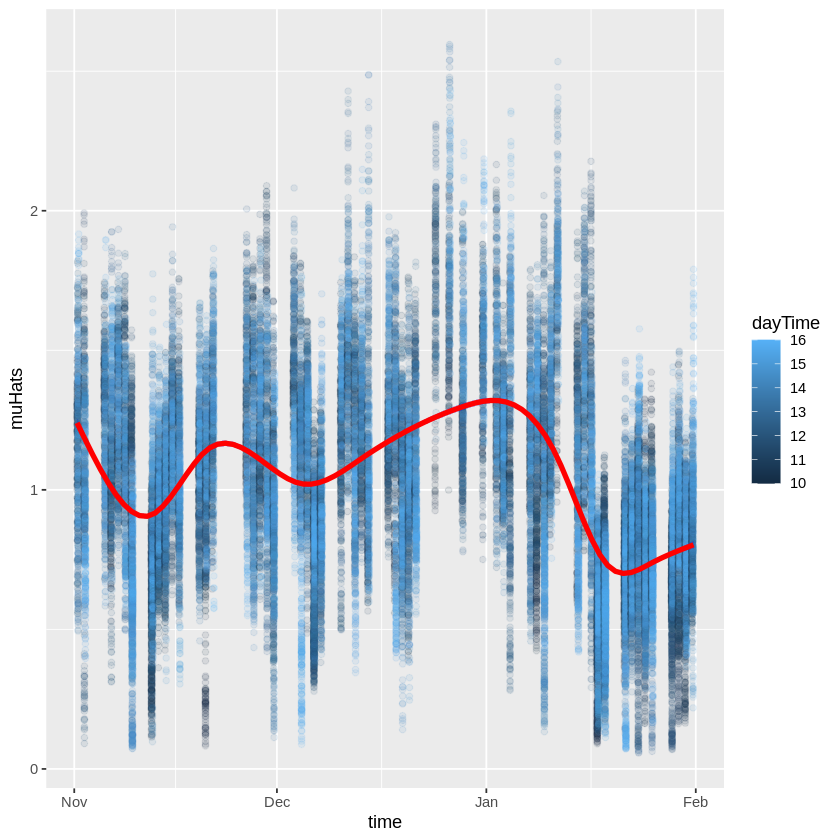

In [474]:
plotScatterAcd(fitModel, x = "time", y = "muHats", colour = "dayTime",
ylag = 0, xlim = NULL, ylim = NULL, alpha = 1/10, smoothMethod =
"auto")

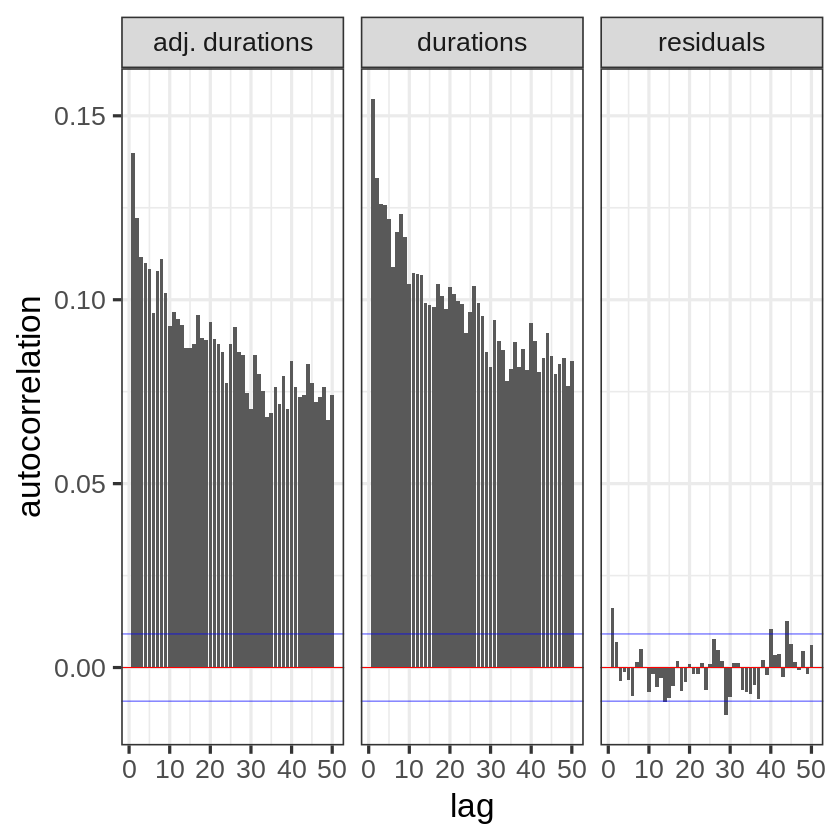

In [475]:
acf_acd(fitModel, conf_level = 0.95, max = 50)

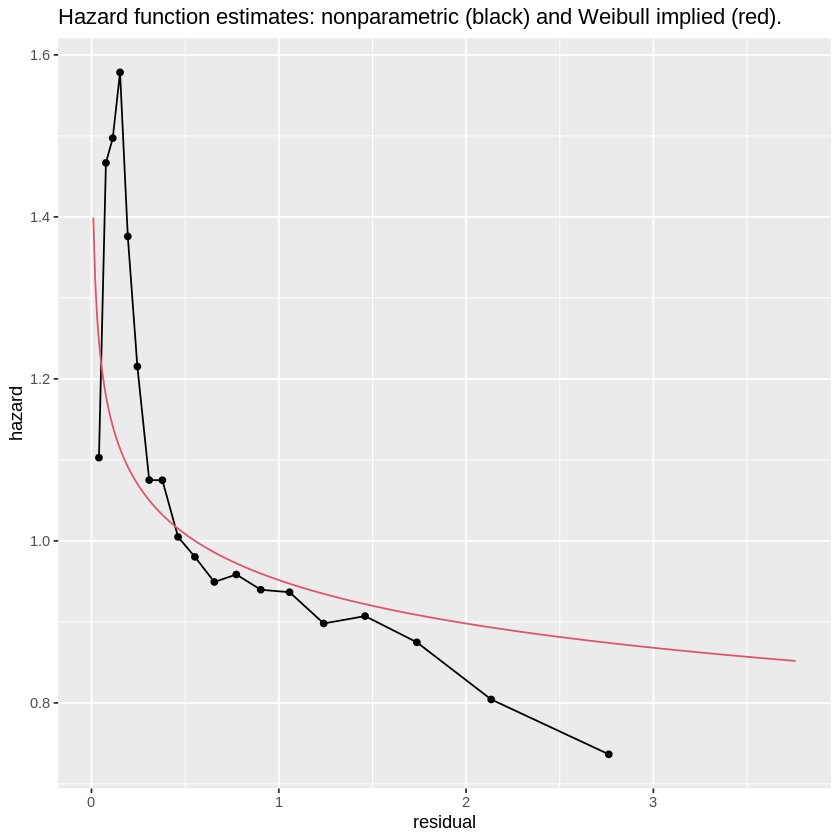

In [476]:
plotHazard(fitModel)

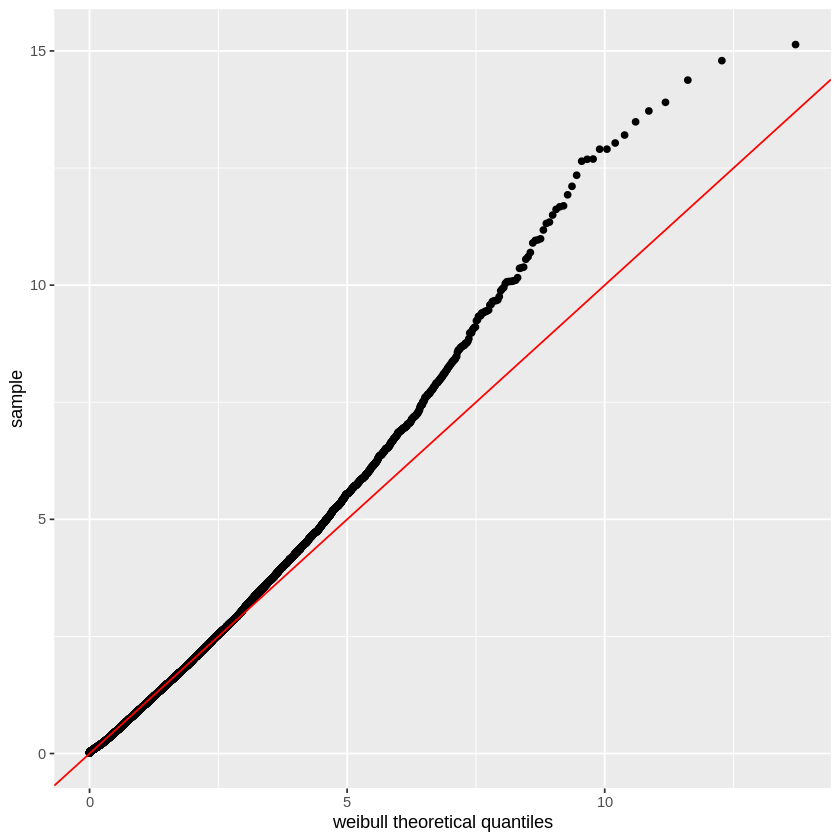

In [477]:
qqplotAcd(fitModel)

# Model ABACD(1,1)

In [478]:
fitModel <- acdFit(durations =adjDurData, model = "ABACD", dist = "weibull", order =c(1,1), dailyRestart = 1)


ACD model estimation by Maximum Likelihood 

Call:
  acdFit(durations = adjDurData, model = "ABACD", dist = "weibull",      order = c(1, 1), dailyRestart = 1) 

Model:
  ABACD(1, 1)

Distribution:
  weibull

N: 46120

Parameter estimate:
          Coef      SE PV
omega  -0.0625 0.00203  0
alpha1  0.0861 0.00256  0
c1      0.2362 0.01374  0
beta1   0.9870 0.00119  0
nu      0.1134 0.00443  0
delta1  0.8982 0.01388  0
delta2  0.5210 0.01153  0
gamma   0.9205 0.00324  0

Note: The p-value for the distribution parameter gamma is from the 2-tailed test H0: gamma = 1.

The fixed/unfree mean distribution parameter: 
 theta: 1.036419

Goodness of fit:
                      value
LogLikelihood -41828.822181
AIC            83673.644363
BIC            83743.556378
MSE                1.615204

Convergence: 0 

Number of log-likelihood function evaluations: 1027 

Estimation time: 18.0515 secs 

Description: Estimated at 2020-11-26 14:59:08 by user root



`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



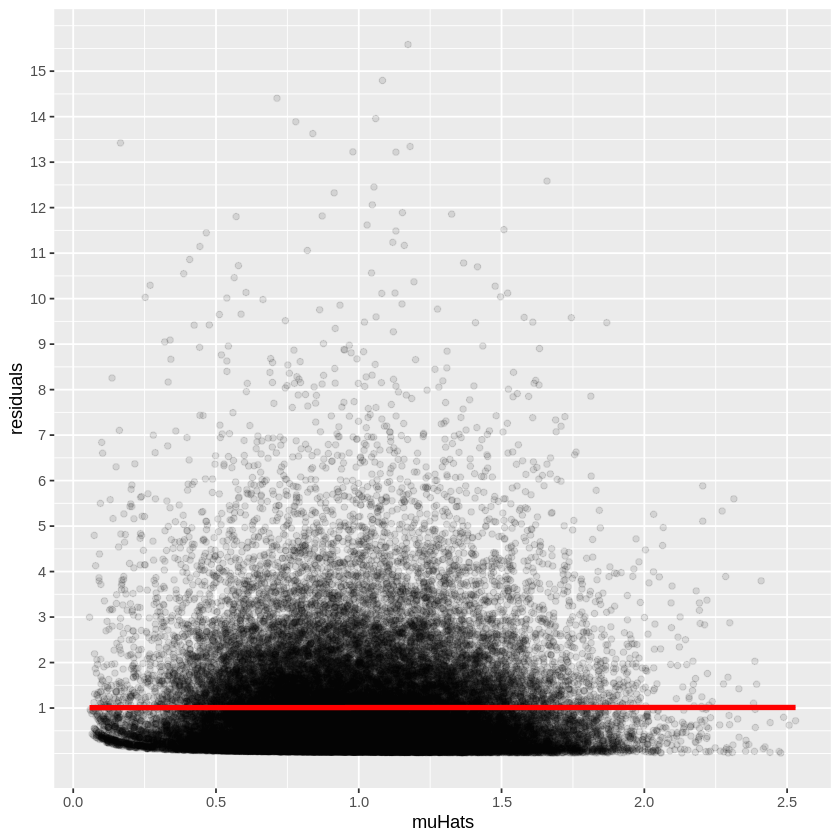

In [479]:
plotScatterAcd(fitModel, x = "muHats", y = "residuals", colour = NULL,
ylag = 0, xlim = NULL, ylim = NULL, alpha = 1/10, smoothMethod =
"auto")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



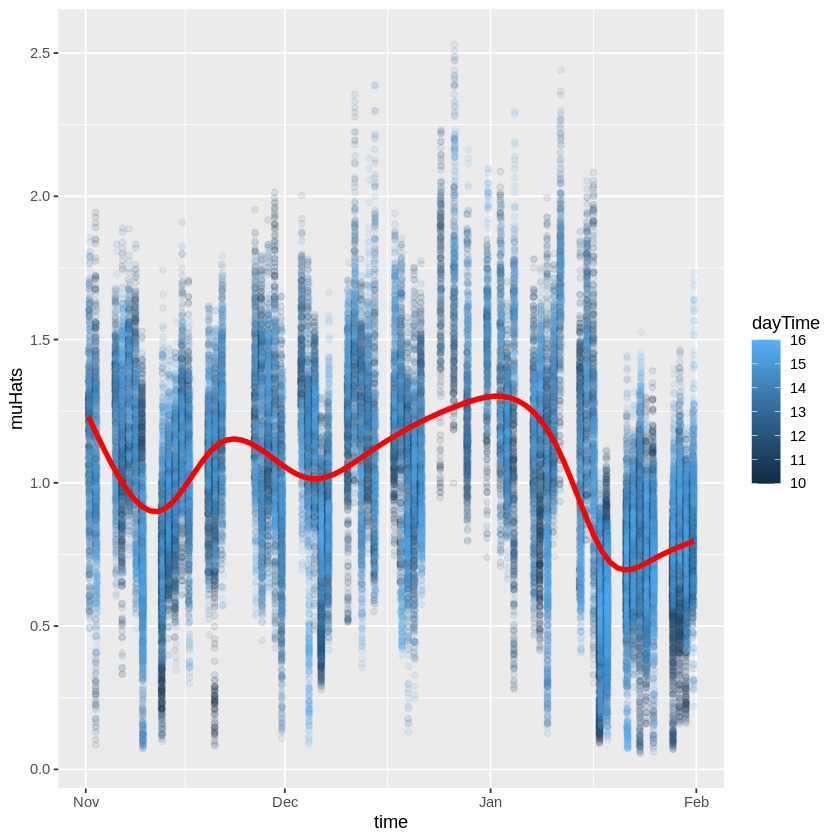

In [480]:
plotScatterAcd(fitModel, x = "time", y = "muHats", colour = "dayTime",
ylag = 0, xlim = NULL, ylim = NULL, alpha = 1/10, smoothMethod =
"auto")

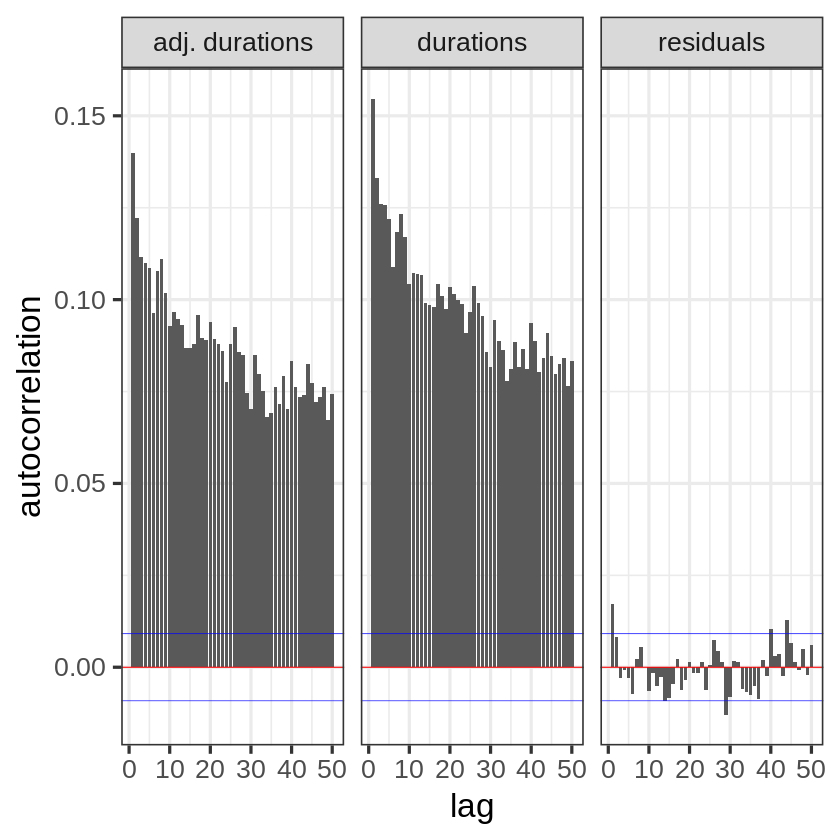

In [481]:
acf_acd(fitModel, conf_level = 0.95, max = 50)

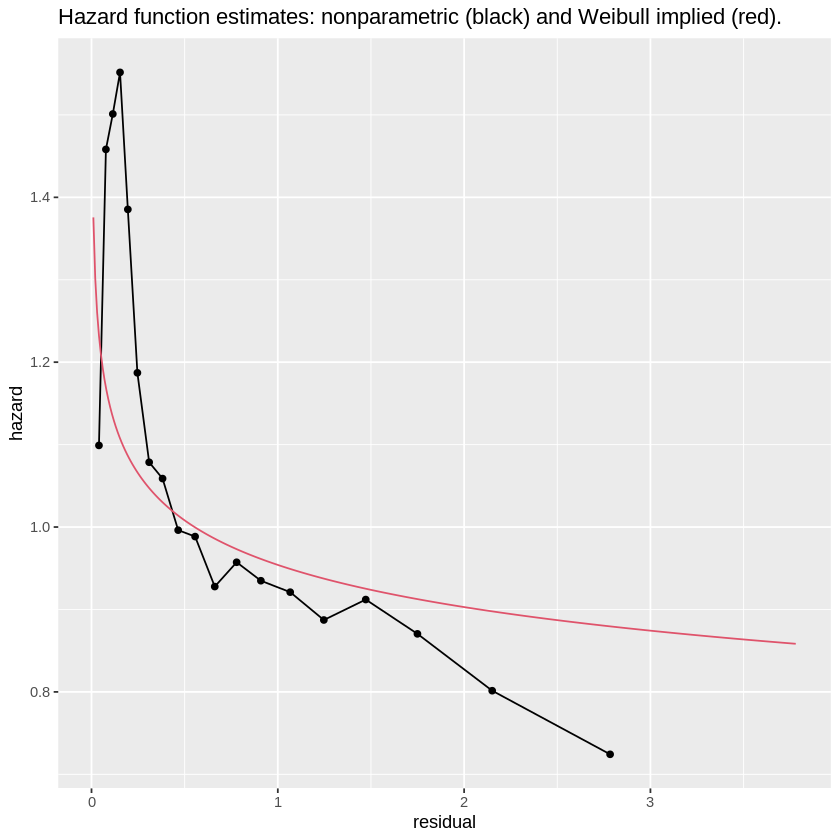

In [482]:
plotHazard(fitModel)

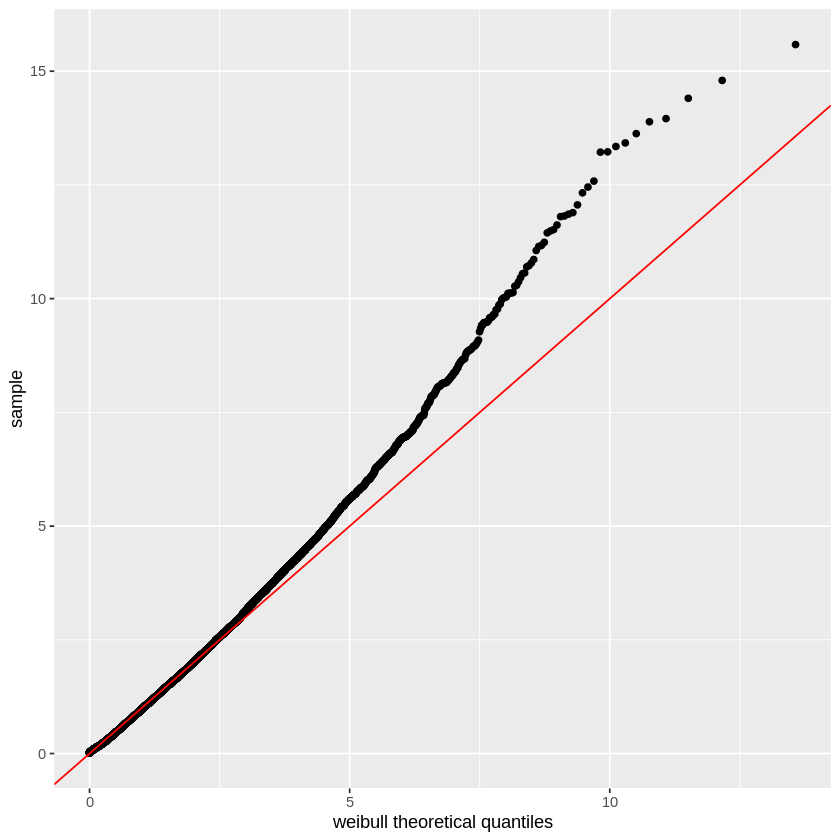

In [483]:
qqplotAcd(fitModel)